In [1]:
import pandas as pd
import warnings
import matplotlib
from pandas.api.types import CategoricalDtype
pd.options.display.float_format = "{:.2f}".format
#matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
warnings.simplefilter("ignore")
import calendar
from IPython.display import Markdown, display


dfDataSheet1 = pd.read_csv('Data/NextOrbit sample Full data_wd1.csv')
dfDataSheet2 = pd.read_csv('Data/NextOrbit sample Full data_wd2.csv')
dfDataSheet3 = pd.read_csv('Data/NextOrbit sample Full data_wd3.csv')
dfDataSheet4 = pd.read_csv('Data/NextOrbit sample Full data_wd4.csv')

dfData = dfDataSheet1.append([dfDataSheet2,dfDataSheet3,dfDataSheet4])
print(dfData.count())
dfData = dfData.drop_duplicates()

def printmd(string):
    display(Markdown(string))
    

uid                          3900716
id                           3900715
total_discount               3900714
created_at                   3900715
total_items                  3900715
is_deleted                   3900714
pos_name                     3900714
delivery_charges             3900714
updated_at                   3900714
total_savings                3900714
invoice_id                   3900714
server_last_modified         3900714
store_id                     3900714
is_credit                    3900714
total_vat_amount             3900714
total_qty                    3900714
is_delivery                  3900714
pending_amount               3900714
total_amount                 3900713
is_memo                      3900714
net_amount                   3900714
uom                          3900713
quantity                     3900714
measure                      3900714
vat_amount                   3900713
pack_size                    3900713
d                            3900713
n

In [170]:
3900716-2896956

uid                id total_discount created_at  total_items  \
0       121952512  13381_3019009104              0    03:34.0         36.0   
1       121952513  13381_3019009104              0    03:34.0         36.0   
2       121952514  13381_3019009104              0    03:34.0         36.0   
3       121952515  13381_3019009104              0    03:34.0         36.0   
4       121952516  13381_3019009104              0    03:34.0         36.0   
...           ...               ...            ...        ...          ...   
876713  159394101  11457_9120009618              0    06:32.0         21.0   
876714  159394102  11457_9120009618              0    06:32.0         21.0   
876715  159394103  11457_9120009618              0    06:32.0         21.0   
876716  159394104  11457_9120009618              0    06:32.0         21.0   
876717  159394105  11457_9120009618              0    06:32.0         21.0   

       is_deleted pos_name  delivery_charges updated_at  total_savings  ...  \
0               0        3               0.0    03:34.0        49400.0  ...   
1               0        3               0.0    03:34.0        49400.0  ...   
2               0        3               0.0    03:34.0        49400.0  ...   
3               0        3               0.0    03:34.0        49400.0  ...   
4               0        3               0.0    03:34.0        49400.0  ...   
...           ...      ...               ...        ...            ...  ...   
876713          0   client               0.0    06:32.0            0.0  ...   
876714          0   client               0.0    06:32.0            0.0  ...   
876715          0   client               0.0    06:32.0            0.0  ...   
876716          0   client               0.0    06:32.0            0.0  ...   
876717          0   client               0.0    06:32.0            0.0  ...   

        cgst_rate cgst_amount  sgst_rate  sgst_amount igst_rate  igst_amount  \
0             0.0         0.0        0.0          0.0       0.0          0.0   
1             0.0         0.0        0.0          0.0       0.0          0.0   
2             2.5       238.0        2.5        238.0       5.0          0.0   
3             0.0         0.0        0.0          0.0       0.0          0.0   
4             0.0         0.0        0.0          0.0       0.0          0.0   
...           ...         ...        ...          ...       ...          ...   
876713        0.0         0.0        0.0          0.0       0.0          0.0   
876714        0.0         0.0        0.0          0.0       0.0          0.0   
876715        0.0         0.0        0.0          0.0       0.0          0.0   
876716        0.0         0.0        0.0          0.0       0.0          0.0   
876717        6.0       257.0        6.0        257.0      12.0          0.0   

       cess_rate  cess_amount additional_cess_rate additional_cess_amount  
0            0.0          0.0                  0.0                    0.0  
1            0.0          0.0                  0.0                    0.0  
2            0.0          0.0                  0.0                    0.0  
3            0.0          0.0                  0.0                    0.0  
4            0.0          0.0                  0.0                    0.0  
...          ...          ...                  ...                    ...  
876713       0.0          0.0                  0.0                    0.0  
876714       0.0          0.0                  0.0                    0.0  
876715       0.0          0.0                  0.0                    0.0  
876716       0.0          0.0                  0.0                    0.0  
876717       0.0          0.0                  0.0                    0.0  

[2896956 rows x 60 columns]

### PURCHASE DISTRIBUTION

No of Baskets  uid    621057
dtype: int64


PURCHASE DISTRIBUTION

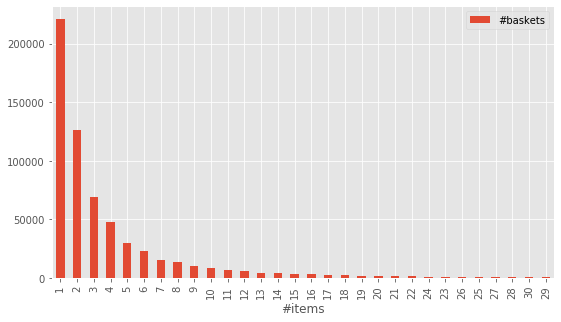

In [121]:
#purchase distribution
dfBaskets = dfData[['uid','id']].groupby('id').count().sort_values(by='uid',ascending=False)

dfBasketCounts = dfBaskets['uid'].value_counts().rename_axis('#items').reset_index(name='#baskets')
dfBasketCounts = dfBasketCounts.set_index('#items')

#Purchase distribution
print('No of Baskets ',dfBaskets.count() )
printmd('PURCHASE DISTRIBUTION')
ax = dfBasketCounts.head(30).plot(kind='bar',figsize = (9,5))

Basket Analysis w.r.t Single and Multiple Items

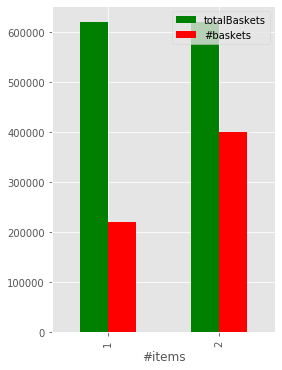

In [132]:
#Basket Analysis w.r.t Single and Multiple Items
dfItemCount = dfBasketCounts[dfBasketCounts.index == 1]
multipleItemCount = dfBasketCounts[dfBasketCounts.index != 1]['#baskets'].sum()
dfItemCount.loc[2] = [multipleItemCount]
dfItemCount['totalBaskets'] = dfBasketCounts['#baskets'].sum()

printmd('Basket Analysis w.r.t Single and Multiple Items')
ax = dfItemCount[["totalBaskets","#baskets"]].plot(kind = 'bar', figsize = (4,6), color = ['g','r'])

Notes:

1. Total no. of Baskets - 6,21,057
2. No. of times someone has bought 1 item - 2,20,760 (35.54%)
3. No. of times someone have bought 2+ item - 4,00,297 (64.45%)

### BASKET METRICS - Consequent, Subsequent

In [143]:
df2QtyBasket = dfData[dfData.total_items == 2.0][['id','name']]
#dropping the purchase of same item twice (1kg rice + 1Kg rice)
df2QtyBasket = df2QtyBasket.drop_duplicates()
print('Total Baskets with 2 Qty items ',df2QtyBasket.count()['id'] )

#Seperating consequent - 1st item of 2 Qty Basket
dfConsItems = df2QtyBasket[df2QtyBasket['id'].duplicated()]
dfConsItems['consequent'] = dfConsItems['name']
dfConsItems = dfConsItems[['id','consequent']]

#Seperating subsequent - 1st item of 2 Qty Basket
dfSubsItems = df2QtyBasket[df2QtyBasket['id'].duplicated(keep='last')]
dfSubsItems['subsequent'] = dfSubsItems['name']
dfSubsItems = dfSubsItems[['id','subsequent']]

#Combined names of Cons and Subs
dfConsSubs = pd.merge(dfConsItems,dfSubsItems,on='id')
dfConsSubs['name'] = dfConsSubs['consequent'] + '_AND_' + dfConsSubs['subsequent']

#Getting count
dfConsSubsCount = dfConsSubs.groupby('name').count().sort_values('id',ascending=False)
dfConsSubsCount['Name'] = dfConsSubsCount.index
dfConsSubsCount = dfConsSubsCount.rename(columns={"id":"#baskets"})

printmd('Basket Counts of 2 Qty Items')
dfConsSubsCount[['#baskets']]

Total Baskets with 2 Qty items  229078


Basket Counts of 2 Qty Items

#baskets
name                                                        
Amul Taza 500ml_AND_Gokul Full Cream 500ml               281
Eggs Anda_AND_Amul Taza 500ml                            262
Amul Taza 500ml_AND_Amul Taza 1ltr                       192
Gokul Full Cream 500ml_AND_Amul Taza 500ml               183
Mother Dairy 500ml_AND_Amul Gold 500ml                   179
...                                                      ...
Funfoods Pizza Topping _AND_TREAT STARS MILK               1
Funfoods Pizza Topping 325G_AND_Thin crust pizza           1
Funfoods Pizza Topping 325G_AND_Attagirl Idli /...         1
Funfoods Peanut Butter Crunchy 340 Gm_AND_eplgamla         1
Lays Magic Masala 59 Gms_AND_Nandini Goodlife  ...         1

[79859 rows x 1 columns]

### Amul Taza 500ml [CASE STUDY]

In [136]:
dfAmulTazaBasket = dfConsSubsCount[dfConsSubsCount.index.str.contains('Amul Taza 500ml')]

#Amul Taza 500ml as Subsequent
dfAmulSubsItems = dfAmulTazaBasket[dfAmulTazaBasket.Name.str.contains('_AND_Amul Taza 500ml')]
dfAmulSubsItems[['subsequent','consequent']] = dfAmulSubsItems['Name'].str.split('_AND_', expand=True)

#Amul Taza 500ml as Consequent
dfAmulConsItems = dfAmulTazaBasket[dfAmulTazaBasket.Name.str.contains('Amul Taza 500ml_AND')]
dfAmulConsItems[['consequent','subsequent',]] = dfAmulConsItems['Name'].str.split('_AND_', expand=True)

dfAmulConsSubs = dfAmulConsItems.append(dfAmulSubsItems)

dfAmulAffItems = dfAmulConsSubs.groupby(['consequent','subsequent']).sum().sort_values(by='#baskets',ascending=False)
dfAmulAffItems.reset_index(inplace=True)
printmd('List of items bought with Amul Taza 500ml')
dfAmulAffItems

List of items bought with Amul Taza 500ml

consequent                   subsequent  #baskets
0    Amul Taza 500ml       Gokul Full Cream 500ml       464
1    Amul Taza 500ml              Amul Taza 1ltr        323
2    Amul Taza 500ml              Amul Gold 500ml       264
3    Amul Taza 500ml           Mother Dairy 200ml       205
4    Amul Taza 500ml        Amul Masti Dahi 400gm       185
..               ...                          ...       ...
188  Amul Taza 500ml                Prabhat chaas         1
189  Amul Taza 500ml   Britannia Brown Bread 400G         1
190  Amul Taza 500ml  Bisleri Mineral Water 20Ltr         1
191  Amul Taza 500ml       Kinley Soda Club 750Ml         1
192  Amul Taza 500ml      Real Juice Lithi 200 Ml         1

[193 rows x 3 columns]

Top 10 most purchased items with Amul Taza 500ML

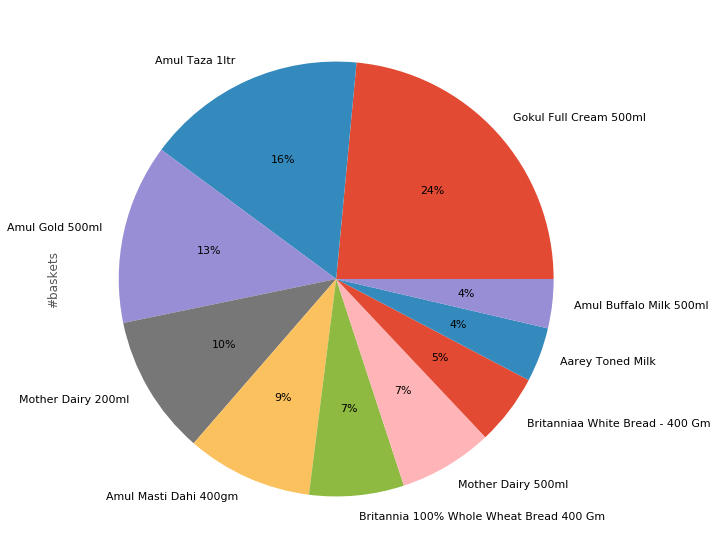

In [145]:
#Top 10 most purchased items with Amul Taza 500ML
dfAmulAffTop10 = dfAmulAffItems[['subsequent','#baskets']].head(10)
dfAmulAffTop10.index = dfAmulAffTop10.subsequent

printmd('Top 10 most purchased items with Amul Taza 500ML')
ax1 = dfAmulAffTop10[['#baskets']].plot.pie(subplots=True,figsize=(25,10),fontsize = "11",autopct='%1.0f%%',legend=False)

In [44]:
dfAmulAffItems

consequent                   subsequent  #baskets
0    Amul Taza 500ml       Gokul Full Cream 500ml       464
1    Amul Taza 500ml              Amul Taza 1ltr        323
2    Amul Taza 500ml              Amul Gold 500ml       264
3    Amul Taza 500ml           Mother Dairy 200ml       205
4    Amul Taza 500ml        Amul Masti Dahi 400gm       185
..               ...                          ...       ...
188  Amul Taza 500ml                Prabhat chaas         1
189  Amul Taza 500ml   Britannia Brown Bread 400G         1
190  Amul Taza 500ml  Bisleri Mineral Water 20Ltr         1
191  Amul Taza 500ml       Kinley Soda Club 750Ml         1
192  Amul Taza 500ml      Real Juice Lithi 200 Ml         1

[193 rows x 3 columns]

### Support, Confidence Lift

In [157]:
# Imp Note - Rounding float values to 5

# Formula for Rule X ==> Y

# Support(X,Y) = frq(X,Y)/N
# Fraction of Baskets that contain both X and Y.
N = 2896956 # Total Baskets
dfAmulAffItems['support'] = dfAmulAffItems['#baskets'] / N

#confidence(X,Y) = frq(X,Y)/frq(X)
#How often items Y appear in Baskets that contain X also.
frqAmulTaza = dfData[['id','name']][dfData.name == 'Amul Taza 500ml'].drop_duplicates()['id'].count()
dfAmulAffItems['confidence'] = dfAmulAffItems['#baskets'] / frqAmulTaza
dfAmulAffItems = dfAmulAffItems.round(5)

#Support(Y) = frq(Y)/N
def getSupportSub(subs,N):
    freqSubs = dfData[['id','name']][dfData.name == subs].drop_duplicates()['id'].count()
    return(freqSubs/N)
dfAmulAffItems['supportSubs'] = dfAmulAffItems.apply(lambda row: getSupportSub(row['subsequent'],N), axis=1)
dfAmulAffItems = dfAmulAffItems.round(5)

#lift = confidence(X,Y)/support(Y)

dfAmulAffItems['lift'] = dfAmulAffItems['confidence'] / dfAmulAffItems['supportSubs']
dfAmulAffItemsMetrics = dfAmulAffItems[['consequent', 'subsequent','#baskets','supportSubs','support',
                                       'confidence','lift']].round(5).sort_values(by='lift', ascending = False)
dfAmulAffItemsMetrics['lift'] = dfAmulAffItemsMetrics['lift'].astype(str)
dfAmulAffItemsMetrics = dfAmulAffItemsMetrics[dfAmulAffItemsMetrics.lift != 'inf']
dfAmulAffItemsMetrics['lift'] = dfAmulAffItemsMetrics.apply(lambda row: round(float(row['lift']),2), axis=1)
dfAmulAffItemsMetrics.head(30)

consequent                                         subsequent  \
42   Amul Taza 500ml                                sada khari.&.cheeni   
67   Amul Taza 500ml                                Prabahat gold 200ml   
70   Amul Taza 500ml                                 Jira Butter Khari    
18   Amul Taza 500ml                                          SPL khari   
36   Amul Taza 500ml                               Amul Sanddwich 400gm   
91   Amul Taza 500ml                                   Amul Taza 2 Ltr    
88   Amul Taza 500ml                                 healthy slice 450g   
52   Amul Taza 500ml                                Modern sunbak Rusk.   
1    Amul Taza 500ml                                    Amul Taza 1ltr    
63   Amul Taza 500ml                                 Special till Toast   
59   Amul Taza 500ml                            Wibs Golden Bread 400gm   
57   Amul Taza 500ml                                 Tayee Butter khari   
44   Amul Taza 500ml                                      Special Toast   
104  Amul Taza 500ml  Amul 400 Gm Plcup Premium Dahi Rich  Creamy Tasty   
98   Amul Taza 500ml                       Amul Shrikhand Kesar 500 Gms   
68   Amul Taza 500ml                            Amul premium Dahi 200gm   
65   Amul Taza 500ml                                             Khari    
4    Amul Taza 500ml                              Amul Masti Dahi 400gm   
19   Amul Taza 500ml                        Modren Sandwich Bread 400Gm   
30   Amul Taza 500ml                  BRITANNIA. MULTI GRAIN BREAD 400g   
34   Amul Taza 500ml                                  Punjab Sada khari   
12   Amul Taza 500ml                            Wibs White Bread 400 Gm   
47   Amul Taza 500ml                              Jeera Butter Makhniya   
9    Amul Taza 500ml                            Amul Buffalo Milk 500ml   
78   Amul Taza 500ml                         modern  multigrain Cookies   
79   Amul Taza 500ml                                  Till butter khari   
39   Amul Taza 500ml                                      cheeni  khari   
35   Amul Taza 500ml                                Till Toast  Special   
55   Amul Taza 500ml                                       Sada butter    
3    Amul Taza 500ml                                 Mother Dairy 200ml   

     #baskets  supportSubs  support  confidence      lift  
42         12      0.00002  0.00000     0.00071      35.5  
67          6      0.00001  0.00000     0.00035      35.0  
70          6      0.00001  0.00000     0.00035      35.0  
18         28      0.00006  0.00001     0.00165      27.5  
36         13      0.00003  0.00000     0.00077  25.66667  
91          4      0.00001  0.00000     0.00024      24.0  
88          4      0.00001  0.00000     0.00024      24.0  
52          8      0.00002  0.00000     0.00047      23.5  
1         323      0.00088  0.00011     0.01903    21.625  
63          7      0.00002  0.00000     0.00041      20.5  
59          7      0.00002  0.00000     0.00041      20.5  
57          7      0.00002  0.00000     0.00041      20.5  
44         10      0.00003  0.00000     0.00059  19.66667  
104         3      0.00001  0.00000     0.00018      18.0  
98          3      0.00001  0.00000     0.00018      18.0  
68          6      0.00002  0.00000     0.00035      17.5  
65          6      0.00002  0.00000     0.00035      17.5  
4         185      0.00064  0.00006     0.01090  17.03125  
19         26      0.00009  0.00001     0.00153      17.0  
30         17      0.00006  0.00001     0.00100  16.66667  
34         14      0.00005  0.00000     0.00082      16.4  
12         44      0.00017  0.00002     0.00259  15.23529  
47         10      0.00004  0.00000     0.00059     14.75  
9          72      0.00029  0.00002     0.00424  14.62069  
78          5      0.00002  0.00000     0.00029      14.5  
79          5      0.00002  0.00000     0.00029      14.5  
39         12      0.00005  0.00000     0.00071      14.2  
35  

#### Notes
1. How many digit to round for the support value? (To handle edge cases)
   - Decided to round to 5 for support value of subsequent item corresponding to Amul Taza 500ml
2. Default value for support value of subsequent item? (To be used with Apriori Algorithm)
3. Edge cases appear as the data is right skewed. Many items are bought only once and does'nt exist in the system. Hence value of N is much larger

In [334]:
def getCategory(name):
    try:
        return(int(dfData[dfData.name == name][['name','category_id']].drop_duplicates().head(1)['category_id'].item()))
    except:
        return(0)

dfAmulAffItemsMetrics['category'] = dfAmulAffItemsMetrics.apply(lambda row: getCategory(row['subsequent']), axis=1)
dfAmulAffItemsMetrics['category'] = dfAmulAffItemsMetrics['category'].astype(int)

dfAmulCatAff = dfAmulAffItemsMetrics.groupby('category').sum()[['#baskets']]

N = 2896956 # Total Baskets
dfAmulCatAff['support'] = dfAmulCatAff['#baskets'] / N

dfAmulCatAff['confidence'] = dfAmulCatAff['#baskets'] / frqAmulTaza
dfAmulCatAff = dfAmulCatAff.round(5)
dfAmulCatAff.reset_index(inplace=True)

def getSupportCat(cat,N):
    freqCat = dfData[['id','category_id']][dfData['category_id'] == cat].drop_duplicates()['id'].count()
    return(freqCat/N)
dfAmulCatAff['supportCat'] = dfAmulCatAff.apply(lambda row: getSupportCat(row['category'],N), axis=1)
dfAmulCatAff = dfAmulCatAff.round(5)



dfAmulCatAff['lift'] = dfAmulCatAff['confidence'] / dfAmulAffItems['supportSubs']
dfAmulCatAff['consequent'] = "Amul Taza 500ml"
dfAmulCatAffMetrics = dfAmulCatAff[['consequent', 'category','#baskets','supportCat','support',
                                       'confidence','lift']].round(5).sort_values(by='lift', ascending = False)
dfAmulCatAffMetrics['lift'] = dfAmulCatAffMetrics['lift'].astype(str)
dfAmulCatAffMetrics = dfAmulCatAffMetrics[dfAmulAffItemsMetrics.lift != 'inf']
dfAmulCatAffMetrics['lift'] = dfAmulCatAffMetrics.apply(lambda row: round(float(row['lift']),2), axis=1)
dfAmulCatAffMetrics


consequent  category  #baskets  supportCat  support  confidence  \
9   Amul Taza 500ml        86       242     0.00543  0.00008     0.01426   
6   Amul Taza 500ml        49      2010     0.01843  0.00069     0.11841   
8   Amul Taza 500ml        65       373     0.01035  0.00013     0.02197   
14  Amul Taza 500ml        99       199     0.00468  0.00007     0.01172   
13  Amul Taza 500ml        98        40     0.00370  0.00001     0.00236   
15  Amul Taza 500ml       100        96     0.00705  0.00003     0.00566   
10  Amul Taza 500ml        93        82     0.05434  0.00003     0.00483   
5   Amul Taza 500ml        46        58     0.00072  0.00002     0.00342   
11  Amul Taza 500ml        95        23     0.00076  0.00001     0.00135   
7   Amul Taza 500ml        63         9     0.00039  0.00000     0.00053   
0   Amul Taza 500ml         0        50     0.00002  0.00002     0.00295   
1   Amul Taza 500ml        13        11     0.00556  0.00000     0.00065   
12  Amul Taza 500ml        97         1     0.00016  0.00000     0.00006   
16  Amul Taza 500ml       110         2     0.00076  0.00000     0.00012   
4   Amul Taza 500ml        43         2     0.00199  0.00000     0.00012   
3   Amul Taza 500ml        30         1     0.00127  0.00000     0.00006   
2   Amul Taza 500ml        27         1     0.00481  0.00000     0.00006   

     lift  
9   49.17  
6   43.86  
8   32.31  
14  22.98  
13  13.11  
15  12.04  
10  11.50  
5    2.22  
11   1.93  
7    1.13  
0    1.00  
1    0.74  
12   0.35  
16   0.20  
4    0.19  
3    0.07  
2    0.05

Text(0, 0.5, '#Baskets')

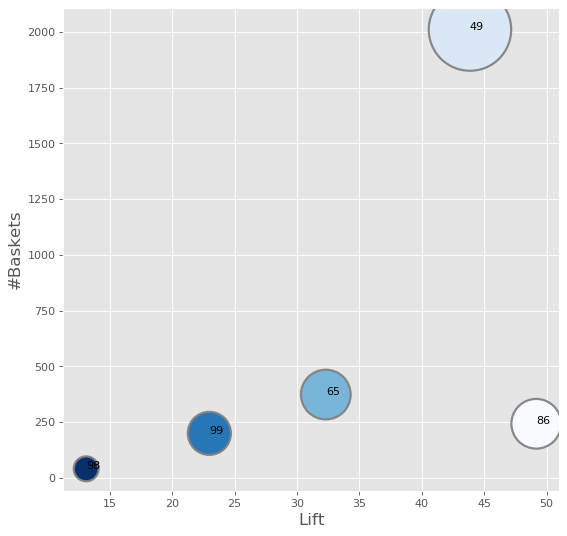

In [547]:
dfAmulCatAffMetricslim = dfAmulCatAffMetrics[dfAmulCatAffMetrics.lift > 13]

#Plotting
y = list(dfAmulCatAffMetricslim['#baskets'])
z = list(dfAmulCatAffMetricslim['lift'])
noOfItemCategory = dfAmulAffItemsMetrics.groupby('category').count()['consequent'].to_dict()
cat = list(dfAmulCatAffMetricslim['category'])
itemsInCat = [noOfItemCategory[i] for i in cat]

n = [i*100 for i in itemsInCat]

#plt.figure(figsize=(8, 8), dpi=80)
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
ax.scatter(z, y, s=n, c=z, cmap="Blues_r", alpha=20, edgecolors="grey", linewidth=2)

for i, txt in enumerate(cat):
    ax.annotate(txt, (z[i], y[i]))

ax.set_xlabel('Lift', fontsize=15)
ax.set_ylabel('#Baskets', fontsize=15)

In [175]:
#Premium Basket Analysis
dfCategory = dfData[['id','name','quantity','d','category_id']].dropna(subset=['name'])
dfCategory = dfCategory[dfCategory['quantity'] > 0]
dfCategory = dfCategory[dfCategory['d'] > 0]
dfCategory['name'] = dfCategory['name'].astype(str)
dfCategory49 = dfCategory[dfCategory['category_id'] == 49]


#dfAmulBrand = dfCategory49[dfCategory49['name'].str.contains('Amul')]

def getRpi(brandName, dfcategory):
    dfbrand = dfcategory[dfcategory['name'].str.contains(brandName)]
    dfbrandRatio = int(dfbrand['d'].mean())/int(dfbrand['quantity'].mean())
    dfcategoryRatio = int(dfcategory['d'].mean())/int(dfcategory['quantity'].mean())
    return(round(dfbrandRatio/dfcategoryRatio,1))

def getRpiBand(rpi):
    if(rpi < 0.9):
        return('Mass')
    elif(rpi > 1.2):
        return('premium')
    else:
        return('Popular')

Brand = ['Amul','Mother Dairy ','Aarey','Gokul ']
dfBrandAnalysis = pd.DataFrame(Brand, columns = ['Brand'])
dfBrandAnalysis['RPI'] = dfBrandAnalysis.apply(lambda row: getRpi(row['Brand'],dfCategory49), axis=1)
dfBrandAnalysis['RPIBand'] = dfBrandAnalysis.apply(lambda row: getRpiBand(row['RPI']), axis=1)

dfBrandAnalysis

Brand  RPI  RPIBand
0           Amul  1.0  Popular
1  Mother Dairy   0.8     Mass
2          Aarey  0.7     Mass
3         Gokul   1.0  Popular

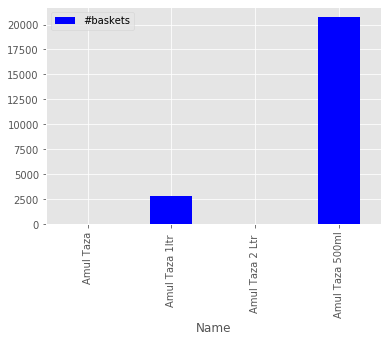

In [177]:
dfSKU = dfData[['id','name']].dropna()
dfSKU = dfSKU[dfSKU.name.str.contains('Amul Taza')]
dfSKU['#baskets'] = dfSKU['id']
#dfSKU.groupby('name').count().sort_values(by='#baskets', ascending=False)['#baskets'].plot(kind='barh')

dfSKUCount = dfSKU.groupby('name').count()
dfSKUCount.reset_index(inplace=True)

def get_name(name):
    Amul500 = ['Amul Taza 500 ml','Amul Taza 500ML','Amul Taza 500ml']
    if(name in Amul500):
        return('Amul Taza 500ml')
    else:
        return(name)
dfSKUCount['Name'] = dfSKUCount.apply(lambda row: get_name(row['name']), axis=1)


dfSKUCount.groupby('Name').sum()[['#baskets']].plot(kind='bar', color='b')


### Buyer Persona

In [47]:
dfBuyerPersona = dfData[['id','net_amount','total_items','name','sale_price']].sort_values(by='sale_price', ascending=False).drop_duplicates()
#cleanup
nameList = ['test 2','test','Balance','others','Others','cash sale','other','Cash sale',
            'Balance 2019 last','Food','Last blance']
dfBuyerPersona = dfBuyerPersona[~dfBuyerPersona.name.isin(nameList)].dropna()
dfBuyerPersona = dfBuyerPersona[~dfBuyerPersona.name.str.contains('Balance 2019')]
priceList = [1.0,0.0]
dfBuyerPersona = dfBuyerPersona[~dfBuyerPersona.total_items.isin(priceList)]
dfBuyerPersona = dfBuyerPersona[~dfBuyerPersona.sale_price.isin(priceList)]
dfBuyerPersona = dfBuyerPersona[~dfBuyerPersona.net_amount.isin(priceList)]
dfBuyerPersona

id  net_amount  total_items                       name  \
586622  12281_2019000711  10761850.0         93.0      Kaju 4 fak 11.340 gm    
20972   12281_2119011371    989000.0          4.0         partap ghee 15 ltr   
565911  12281_6119037661    858900.0          2.0         partap ghee 15 ltr   
226421  12281_6119034122    835090.0         11.0         partap ghee 15 ltr   
758008  12281_2019000703   1757500.0          7.0         partap ghee 15 ltr   
...                  ...         ...          ...                        ...   
997032  14161_1019013336     82056.0         20.0                     CHAWLI   
997867  14161_1019013339     15542.0          8.0                     CHAWLI   
996967  14161_1019013334     81186.0         14.0                     CHAWLI   
963861  14161_1020002056     50785.0          9.0                 DRUM STICK   
726069  11457_1119009856    189704.0         13.0  BEDEKAR JESHTHAMADH POWER   

        sale_price  
586622    793000.0  
20972     785000.0  
565911    785000.0  
226421    785000.0  
758008    785000.0  
...            ...  
997032        11.0  
997867        11.0  
996967        11.0  
963861        10.0  
726069         4.0  

[1975746 rows x 5 columns]

In [172]:
dfBuyerPersona[dfBuyerPersona['net_amount'] < dfBuyerPersona['sale_price']]

id  net_amount  total_items  \
249658  12258_211900123902    667480.0         49.0   
365816   12258_33119055646    177700.0         18.0   
368968   12258_33119053739     77600.0         12.0   
371735   12258_33119054132     81000.0          8.0   
343864   12258_33119052720     73500.0          2.0   
...                    ...         ...          ...   
456467   11322_28120015827      -400.0          2.0   
217974   11322_28119083047      -420.0          2.0   
154992   11322_28120012421      -900.0          2.0   
33848    11322_28119087923     -5200.0          5.0   
33033    11322_28120001098      -500.0          2.0   

                                                     name  sale_price  
249658                                             ELECHI    700000.0  
365816                                             ELECHI    700000.0  
368968                                             ELECHI    700000.0  
371735                                             ELECHI    700000.0  
343864                                             ELECHI    700000.0  
...                                                   ...         ...  
456467                               Allwin milky hearts        100.0  
217974                          Kores White Chalk 1rs 2pc       100.0  
154992  Candy Man [Hb Cndy] 3145 Gm Pljar Fruitee Fun ...       100.0  
33848                                ಚಕ್ಕುಲಿ chakkali 1rs       100.0  
33033                                     Clinic plus 60%       100.0  

[34208 rows x 5 columns]

In [87]:
dfBuyerPersona['percentageSpent'] = dfBuyerPersona['sale_price']/dfBuyerPersona['net_amount']
dfBuyerPersona.sort_values(by='sale_price', ascending = False).head(30)

id  net_amount  total_items                   name  \
586622     12281_2019000711  10761850.0         93.0  Kaju 4 fak 11.340 gm    
225744     12281_8119007551   1035225.0         19.0     partap ghee 15 ltr   
340122     12281_6019000440   2500540.0         45.0     partap ghee 15 ltr   
675521     12281_2019000754   4497340.0         44.0     partap ghee 15 ltr   
781015     12281_8119011405    795000.0          2.0     partap ghee 15 ltr   
20972      12281_2119011371    989000.0          4.0     partap ghee 15 ltr   
758008     12281_2019000703   1757500.0          7.0     partap ghee 15 ltr   
565911     12281_6119037661    858900.0          2.0     partap ghee 15 ltr   
226421     12281_6119034122    835090.0         11.0     partap ghee 15 ltr   
162643     12281_2019000586   4459640.0         45.0     partap ghee 15 ltr   
288222     12281_2019000589    821150.0          5.0     partap ghee 15 ltr   
496011     12281_2119008961   1021500.0          6.0     partap ghee 15 ltr   
390121     12281_8119006552    847432.0          5.0     partap ghee 15 ltr   
322161     12281_2119009374    919500.0          6.0      Vita ghee 15 ltr    
622318     12281_6119036581   1723940.0         41.0      Vita ghee 15 ltr    
242466  12258_3311905198801     43400.0          8.0                 ELECHI   
343724    12258_33119052669     48920.0          5.0                 ELECHI   
343855    12258_33119052718    584400.0         13.0                 ELECHI   
369045    12258_33119053734    173500.0         32.0                 ELECHI   
364506    12258_33119055338     49000.0          9.0                 ELECHI   
372314    12258_33119054257     72700.0          5.0                 ELECHI   
343866  12258_3311905272001     10500.0          2.0                 ELECHI   
242459    12258_33119051988     42000.0          7.0                 ELECHI   
244296    12258_33119052506     20500.0          4.0                 ELECHI   
285200    12258_33119056640   1396200.0         33.0                 ELECHI   
360978    12258_33119054528    752400.0         12.0                 ELECHI   
344085    12258_33119052770     87450.0         12.0                 ELECHI   
364035  12258_3311905521301     22000.0          2.0                 ELECHI   
364033    12258_33119055213     20000.0          2.0                 ELECHI   
372704    12258_33119054349    341300.0         29.0                 ELECHI   

        sale_price  percentageSpent  
586622    793000.0         0.073686  
225744    785000.0         0.758289  
340122    785000.0         0.313932  
675521    785000.0         0.174548  
781015    785000.0         0.987421  
20972     785000.0         0.793731  
758008    785000.0         0.446657  
565911    785000.0         0.913960  
226421    785000.0         0.940018  
162643    778000.0         0.174454  
288222    778000.0         0.947452  
496011    775000.0         0.758688  
390121    775000.0         0.914528  
322161    720000.0         0.783034  
622318    719000.0         0.417068  
242466    700000.0        16.129032  
343724    700000.0        14.309076  
343855    700000.0         1.197810  
369045    700000.0         4.034582  
364506    700000.0        14.285714  
372314    700000.0         9.628611  
343866    700000.0        66.666667  
242459    700000.0        16.666667  
244296    700000.0        34.146341  
285200    700000.0         0.501361  
360978    700000.0         0.930356  
344085    700000.0         8.004574  
364035    700000.0        31.818182  
364033    700000.0        35.000000  
372704    700000.0         2.050982

In [93]:
dfData

uid                id total_discount created_at  total_items  \
0       121952512  13381_3019009104              0    03:34.0         36.0   
1       121952513  13381_3019009104              0    03:34.0         36.0   
2       121952514  13381_3019009104              0    03:34.0         36.0   
3       121952515  13381_3019009104              0    03:34.0         36.0   
4       121952516  13381_3019009104              0    03:34.0         36.0   
...           ...               ...            ...        ...          ...   
876713  159394101  11457_9120009618              0    06:32.0         21.0   
876714  159394102  11457_9120009618              0    06:32.0         21.0   
876715  159394103  11457_9120009618              0    06:32.0         21.0   
876716  159394104  11457_9120009618              0    06:32.0         21.0   
876717  159394105  11457_9120009618              0    06:32.0         21.0   

       is_deleted pos_name  delivery_charges updated_at  total_savings  ...  \
0               0        3               0.0    03:34.0        49400.0  ...   
1               0        3               0.0    03:34.0        49400.0  ...   
2               0        3               0.0    03:34.0        49400.0  ...   
3               0        3               0.0    03:34.0        49400.0  ...   
4               0        3               0.0    03:34.0        49400.0  ...   
...           ...      ...               ...        ...            ...  ...   
876713          0   client               0.0    06:32.0            0.0  ...   
876714          0   client               0.0    06:32.0            0.0  ...   
876715          0   client               0.0    06:32.0            0.0  ...   
876716          0   client               0.0    06:32.0            0.0  ...   
876717          0   client               0.0    06:32.0            0.0  ...   

        cgst_rate cgst_amount  sgst_rate  sgst_amount igst_rate  igst_amount  \
0             0.0         0.0        0.0          0.0       0.0          0.0   
1             0.0         0.0        0.0          0.0       0.0          0.0   
2             2.5       238.0        2.5        238.0       5.0          0.0   
3             0.0         0.0        0.0          0.0       0.0          0.0   
4             0.0         0.0        0.0          0.0       0.0          0.0   
...           ...         ...        ...          ...       ...          ...   
876713        0.0         0.0        0.0          0.0       0.0          0.0   
876714        0.0         0.0        0.0          0.0       0.0          0.0   
876715        0.0         0.0        0.0          0.0       0.0          0.0   
876716        0.0         0.0        0.0          0.0       0.0          0.0   
876717        6.0       257.0        6.0        257.0      12.0          0.0   

       cess_rate  cess_amount additional_cess_rate additional_cess_amount  
0            0.0          0.0                  0.0                    0.0  
1            0.0          0.0                  0.0                    0.0  
2            0.0          0.0                  0.0                    0.0  
3            0.0          0.0                  0.0                    0.0  
4            0.0          0.0                  0.0                    0.0  
...          ...          ...                  ...                    ...  
876713       0.0          0.0                  0.0                    0.0  
876714       0.0          0.0                  0.0                    0.0  
876715       0.0          0.0                  0.0                    0.0  
876716       0.0          0.0                  0.0                    0.0  
876717       0.0          0.0                  0.0                    0.0  

[2896956 rows x 60 columns]

Total items  2896953


Total Items distribution

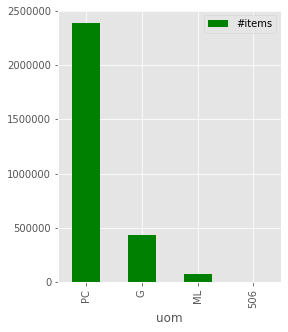

In [138]:
dfUom = dfData[['uom','id']].dropna()
print('Total items ', dfUom.count()['uom'])
dfUom = dfUom.rename(columns={"id": "#items"})
dfUomCount = dfUom.groupby('uom').count().sort_values(by='#items', ascending=False)
printmd('Total Items distribution')
ax = dfUomCount.plot(kind='bar',figsize = (4,5), color = 'g')

Total items  2896954
Total unique stores -  22


Total Items sold per store distribution

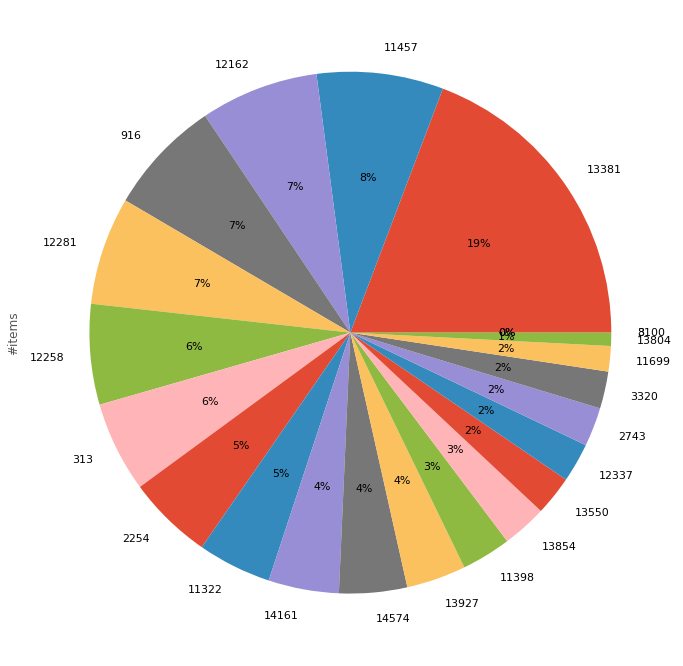

In [158]:
dfStore = dfData[['store_id','id']].dropna()
dfStore = dfStore.rename(columns={"id": "#items"})
print('Total items ', dfStore.count()['store_id'])
dfStore['store_id'] = dfStore['store_id'].astype(int)
dfStoreCount = dfStore.groupby('store_id').count().sort_values(by='#items', ascending=False)
print('Total unique stores - ', dfStoreCount.count()['#items'])
printmd('Total Items sold per store distribution')
ax1 = dfStoreCount[['#items']].plot.pie(subplots=True,figsize=(45,12),fontsize = "11",autopct='%1.0f%%',legend=False)


Total items  2896946


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

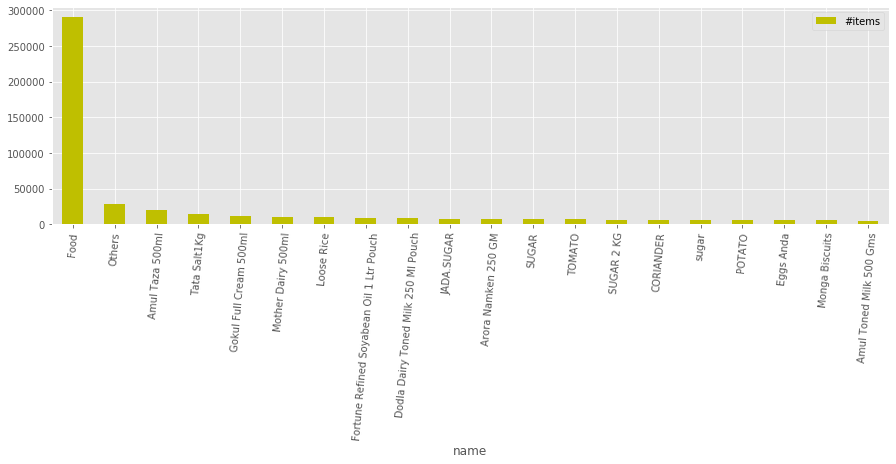

In [110]:
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

dfUniqueItems = dfData[['uid','name']].dropna()
dfUniqueItems = dfUniqueItems.rename(columns={"uid": "#items"})
dfUniqueItemsCount = dfUniqueItems.groupby('name').count().sort_values(by='#items', ascending=False)
print('Total items ', dfUniqueItems.count()['name'])
#dfUniqueItems['store_id'] = dfUniqueItems['store_id'].astype(int)

#print('Total unique stores - ', dfStoreCount.count()['#items'])
#printmd('Total Items sold per store distribution')

ax = dfUniqueItemsCount.head(20).plot(kind='bar',figsize = (15,4), color = 'y')
plt.xticks(rotation=85)

Total items  1633550
Total category 103


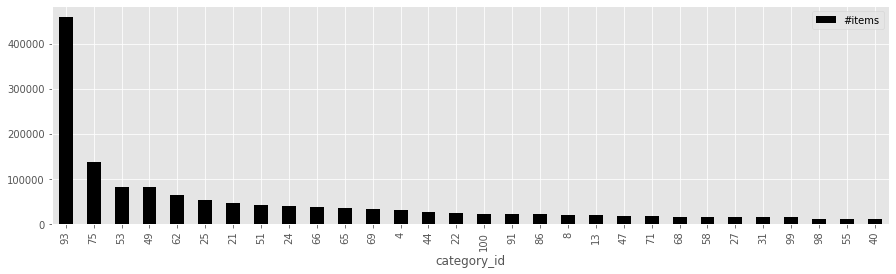

In [139]:
dfCategory = dfData[['uid','category_id']].dropna()
dfCategory = dfCategory.rename(columns={"uid": "#items"})
dfCategory['category_id'] = dfCategory['category_id'].astype('int')
dfCategoryCount = dfCategory.groupby('category_id').count().sort_values(by='#items', ascending=False)
print('Total items ', dfCategory.count()['category_id'])
print('Total category', dfCategoryCount.count()['#items'])
ax = dfCategoryCount.head(30).plot(kind='bar',figsize = (15,4), color = 'k')


In [467]:
#bulk Analysis
dfQuantity = dfData[['id','name','quantity']].dropna()
dfQuantity = dfData[['id','name','quantity']].drop_duplicates()
dfQuantity['qty'] = pd.to_numeric(dfQuantity['quantity'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
dfQuantity = dfQuantity[dfQuantity['qty'] > 2]

dfQuantity['#baskets'] = dfQuantity['id']


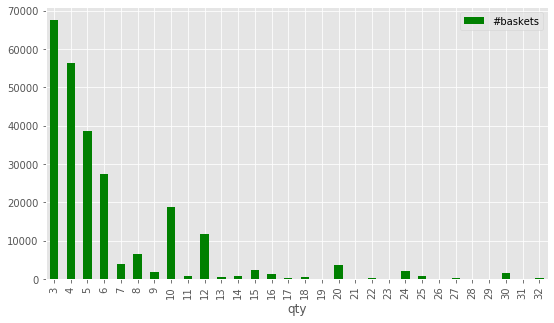

In [500]:

dfQtyCount = dfQuantity.groupby('qty').count()[['#baskets']]
dfQtyCount.head(30).plot(kind='bar', figsize=(9,5), color = 'g')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

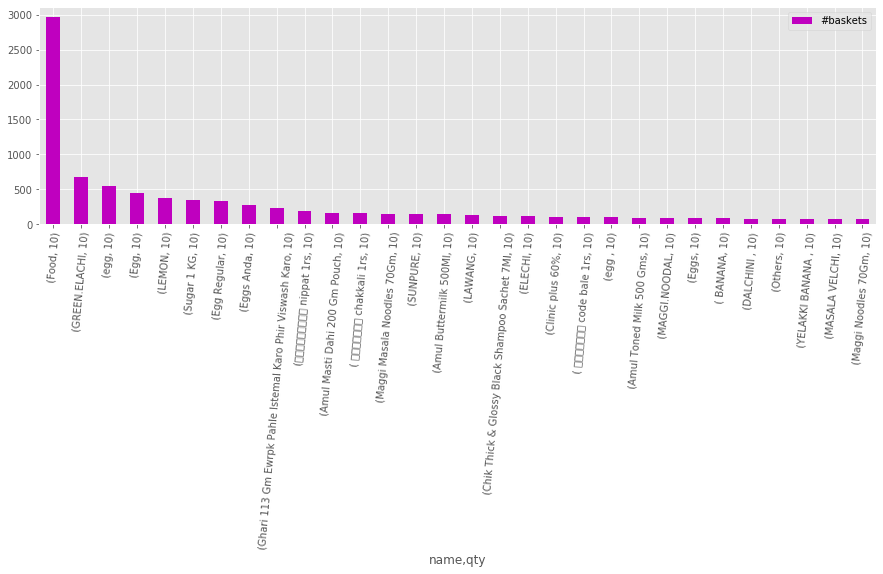

In [501]:
dfTenQtyItems = dfQuantity[dfQuantity['qty'] == 10][['name','qty','#baskets']]
dfTenQtyItems = dfTenQtyItems.groupby(['name','qty']).count().sort_values(by='#baskets', ascending=False)
ax = dfTenQtyItems.head(30).plot(kind='bar',figsize = (15,4), color = 'm')
plt.xticks(rotation=85)

In [506]:
#Dropping the analysis
dfQtyItems = dfQuantity.groupby(['name','qty']).count().sort_values(by='#baskets', ascending=False)[['#baskets']]
dfQtyItems.reset_index(inplace=True)


#ax = dfQtyItems.head(5).plot(kind='bar', figsize = (9,5))
#plt.xticks()

In [561]:
dfQtyItems

name    qty  #baskets
0                                       Food      3      8072
1                                       Food      5      6857
2                            Amul Taza 500ml    500      5616
3                                       Food      4      5201
4                                       Food      6      4011
...                                      ...    ...       ...
85520                        Banana (Elakki)    285         1
85521                                NACHANI  10000         1
85522                        Banana (Elakki)    273         1
85523                      NACHANI ATTA 500G   6000         1
85524  PICKWICK-BISCUITS CRM WAFER STRW 75GM      4         1

[85525 rows x 3 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x395c19950>,
      dtype=object)

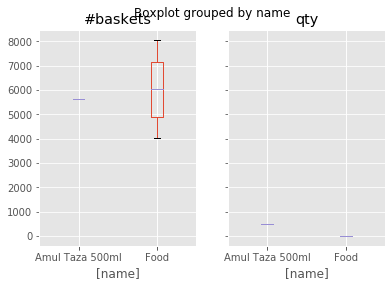

In [563]:
dfQtyItems.head(5).boxplot(by='name')

In [622]:
dfDiscount = dfData[['name','quantity','savings']].dropna()
dfDiscount['qty'] = pd.to_numeric(dfDiscount['quantity'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
dfDiscount['Discount'] = pd.to_numeric(dfDiscount['savings'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
dfDiscountFilter = dfDiscount[dfDiscount.Discount > 0]

dfDiscountCount = dfDiscountFilter.groupby(['name','Discount']).count().sort_values(by='qty', ascending=False)[['quantity']]
dfDiscountCount.reset_index(inplace=True)

dfDiscountTop25 = dfDiscountCount.head(29).drop_duplicates(subset=['name'])

ItemList = list(dfDiscountTop25['name'])
dfNoDiscount = dfDiscount[(dfDiscount.Discount == 0) & (dfDiscount.name.isin(ItemList))]

dfNoDiscountCount = dfNoDiscount.groupby(['name','Discount']).count().sort_values(by='qty', ascending=False)[['quantity']]
dfNoDiscountCount['QtyNoDiscount'] = dfNoDiscountCount['quantity']
dfNoDiscountCount.reset_index(inplace=True)
dfNoDiscountCount = dfNoDiscountCount[['name','QtyNoDiscount']]


dfDiscountAnalysis = pd.merge(dfDiscountTop25,dfNoDiscountCount)[['QtyNoDiscount','Discount','quantity','name']]
dfDiscountAnalysis = dfDiscountAnalysis.set_index('name')



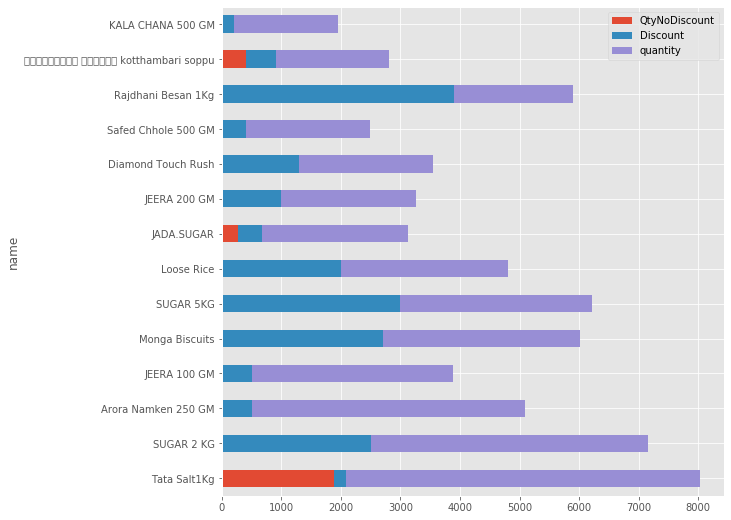

In [632]:
dfDiscountAnalysis.plot(kind='barh', figsize=(9,9), stacked=True)

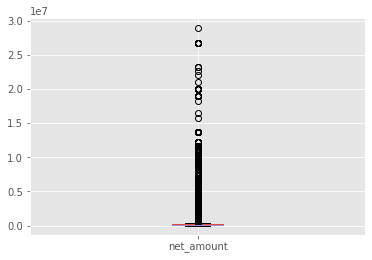

In [34]:
#Net Amount Analysis
dfNetAmount = dfData[['net_amount']].dropna()
dfNetAmount = dfNetAmount[dfNetAmount['net_amount'] > 0]
dfNetAmount['net_amount'] = dfNetAmount['net_amount'].astype(int)


dfNetAmountFilter = dfNetAmount[dfNetAmount['net_amount'] < 200000000]
dfNetAmountFilter[['net_amount']].boxplot()

In [79]:
dfAnchor = dfData[['category_id','name','id']].drop_duplicates().dropna()
dfAnchor['category_id'] = dfAnchor['category_id'].astype(int)
dfAnchor['#baskets'] = dfAnchor['id']
dfAnchor.groupby(['category_id','name']).count().sort_values(by='#baskets', ascending=False)[['#baskets']].head(25)

#baskets
category_id name                                                        
93          Food                                                   52713
            Others                                                 12934
49          Amul Taza 500ml                                        12272
            Gokul Full Cream 500ml                                  6099
100         Dodla Dairy Toned Milk 250 Ml Pouch                     5920
75          TOMATO                                                  5270
            CORIANDER                                               5151
51          Tata Salt1Kg                                            5042
49          Mother Dairy 500ml                                      5002
51          SUGAR                                                   4695
            JADA.SUGAR                                              4588
75          POTATO                                                  4350
            LEMON                                                   4059
            ONION                                                   3742
            Egg                                                     3507
93          Eggs Anda                                               3472
75          GREEN CAPSICUM                                          3222
62          GUJARAT                                                 3088
66          MAIDA                                                   3073
75          GINGER                                                  3073
            WHITE CUCUMBER                                          3052
100         Nandini Shubham Pasteurised Standarised Milk 50...      2982
75           BANANA                                                 2927
93          Amul Toned Milk 500 Gms                                 2850
51          sugar                                                   2781

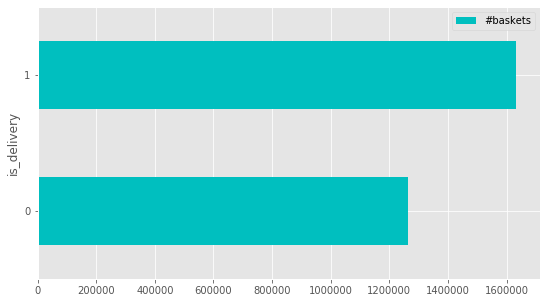

In [191]:
dfDelivery = dfData[['id','is_delivery']].dropna()
dfDelivery['is_delivery'] = pd.to_numeric(dfDelivery['is_delivery'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
dfDelivery['#baskets'] = dfDelivery['id']
dfDelivery.groupby('is_delivery').count()[['#baskets']].plot(kind='barh', figsize=(9,5), color = 'c')

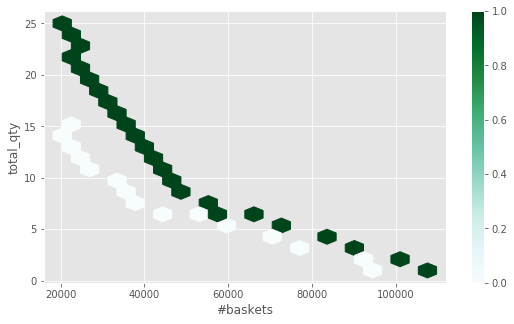

In [237]:
dfDeliveryQty = dfData[['id','is_delivery','total_qty']].dropna()
dfDeliveryQty['is_delivery'] = pd.to_numeric(dfDeliveryQty['is_delivery'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
dfDeliveryQty['#baskets'] = dfDeliveryQty['id']
dfDeliveryQty['total_qty'] = dfDeliveryQty['total_qty'].astype(int)
dfDeliveryQtyAnalysis = dfDeliveryQty.groupby(['is_delivery','total_qty']).count()[['#baskets']].sort_values(by='#baskets', ascending=False).head(40)
dfDeliveryQtyAnalysis.reset_index(inplace=True)

fig, ax = plt.subplots()
dfDeliveryQtyAnalysis.plot.hexbin(x='#baskets', y='total_qty', C='is_delivery' ,gridsize=20, figsize= (9,5), ax=ax)

In [62]:
dfMeasure = dfData[['measure','id']].drop_duplicates().dropna()
dfMeasure['measure'] = dfMeasure['measure'].astype(int)
dfMeasure[]

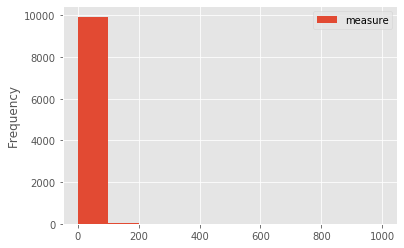

In [70]:
dfMeasure.head(10000).plot(kind='hist')

In [71]:
dfMeasure.groupby('measure').count()

id
measure        
0         56914
1        566760
5             2
7             5
8             5
...         ...
2250          8
4000          1
5000          3
6000          1
10000         3

[80 rows x 1 columns]

In [45]:
dfCatExpenseCount = dfCatExpense.groupby('category_id').sum().sort_values(by='totalPrice', ascending=False)

In [48]:
dfCatExpenseCount.reset_index(inplace=True)

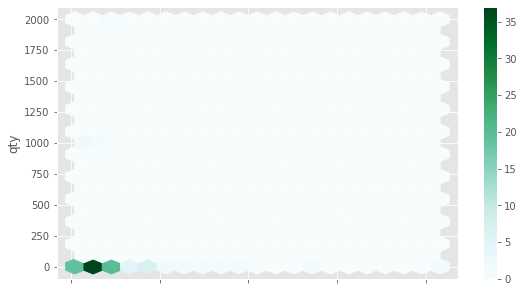

In [58]:
dfCatExpense.head(100).plot.hexbin(x='totalPrice', y='qty', gridsize=20, figsize= (9,5))

In [39]:
#dfBillDate = dfData[['id','bill_started_at','total_items','name']].dropna()
dfBillDate = dfData.dropna(subset=['bill_started_at'])
dfBillDate = dfBillDate[dfBillDate.bill_started_at.str.contains('2020')]
dfBillDate['bill_started_at'] = dfBillDate['bill_started_at'].astype(str)

In [40]:
def getBillDate(d):
    return(d.split('2020 ')[0] + '2020')
def getBillFormat(d):
    monthDict = {'Jan': '1','Feb':'2','Mar':'3'}
    monthlist = ['Jan','Feb','Mar']
    if(any(s in d for s in monthlist)):
        year = '2020'
        m = d.split(' ')[0]
        month = monthDict[d.split(' ')[0]]
        date = d.strip(m).strip(year).strip(' ')
        res = month + '/' + date + '/' + year
        #print(d)
        #print(res)
        return(res)
    else:
        return(d)


dfBillDate['BillDate'] = dfBillDate.apply(lambda row: getBillDate(row['bill_started_at']), axis=1)
dfBillDate['BillDateFormat'] = dfBillDate.apply(lambda row: getBillFormat(row['BillDate']), axis=1)
dfBillDate['Date'] = pd.to_datetime(dfBillDate['BillDateFormat'])

dfBillDate['day'] = dfBillDate['Date'].dt.day
dfBillDate['month'] = dfBillDate['Date'].dt.month
dfBillDate['year'] = dfBillDate['Date'].dt.year
dfBillDate['DayName'] = dfBillDate['Date'].dt.day_name()
dfBillDate['Timestamp'] = dfBillDate['month'].astype(str) + '-' + dfBillDate['year'].astype(str)

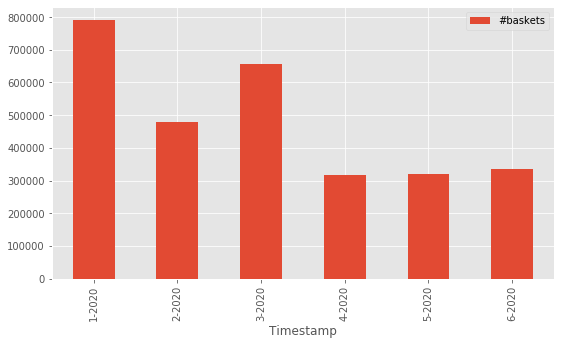

In [53]:
matplotlib.style.use('ggplot')
dfBillDate['#baskets'] = dfBillDate['id']
dfBillDate.groupby('Timestamp').count()[['#baskets']].plot(kind='bar', figsize=(9,5))

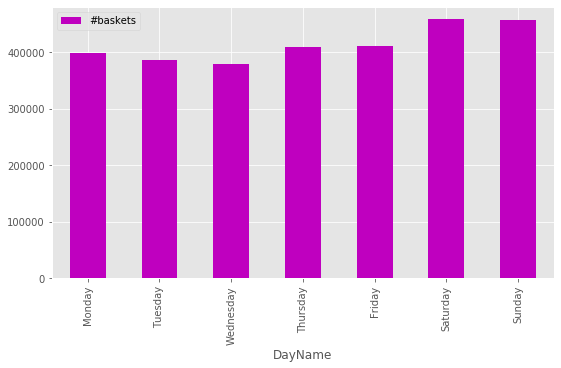

In [72]:
cat_type = CategoricalDtype(categories=cats, ordered=True)
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dfBillDate['Day of Week'] = dfBillDate['DayName'].astype(cat_type)
dfBillDate.groupby('DayName').count().reindex(cats)[['#baskets']].plot(kind='bar', figsize=(9,5), color = 'm')

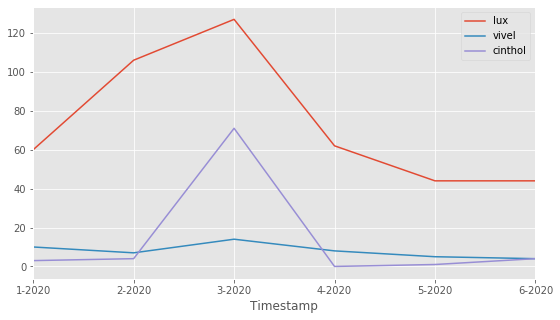

In [124]:
dflux = dfBillDate[(dfBillDate.name == 'lux') | (dfBillDate.name.str.contains('lux '))]
dfTimeBrand = dflux.groupby('Timestamp').count()[['name']]
dfTimeBrand['lux'] = dfTimeBrand['name']
dfvivel = dfBillDate[(dfBillDate.name.str.contains('vivel'))]
dfTimeBrand['vivel'] = dfvivel.groupby('Timestamp').count()['name']
dfcinthol = dfBillDate[(dfBillDate.name.str.contains('cinthol'))]
dfTimeBrand['cinthol'] = dfcinthol.groupby('Timestamp').count()['name']
dfTimeBrand = dfTimeBrand.fillna(0)
dfTimeBrand[['lux','vivel','cinthol']].plot(kind='line', figsize = (9,5))

Text(0, 0.5, '#Baskets')

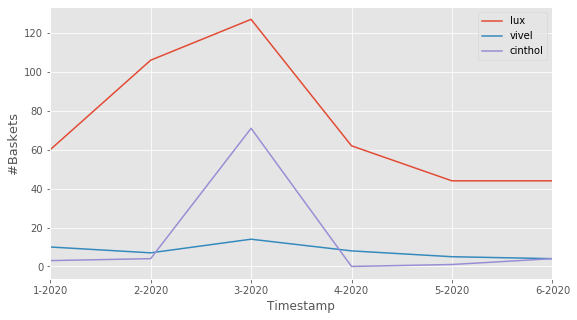

In [166]:
ax = dfTimeBrand[['lux','vivel','cinthol']].plot(kind='line', figsize = (9,5))
ax.set_ylabel('#Baskets', fontsize=13)

In [149]:
def get_discount(d):
    if(d <= 0):
        return(0)
    else:
        return(d)

dfDiscountBrand = dfBillDate[['id','name','savings','Timestamp','d']]
dfDiscountBrand = dfDiscountBrand.fillna(0)
dfDiscountBrand['Discount'] = pd.to_numeric(dfDiscountBrand['savings'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
dfDiscountBrand['DiscountFormatted'] = dfDiscountBrand.apply(lambda row: get_discount(row['Discount']), axis=1)

#dfDiscountBrand = dfDiscountBrand[dfDiscountBrand.Discount > 0]

dfDiscountBrand['DiscountPercentage'] = (100 - ((dfDiscountBrand['d'] - dfDiscountBrand['DiscountFormatted'])*100)/dfDiscountBrand['d'])
dfDiscountBrand['DiscountPercentage'] = dfDiscountBrand.apply(lambda row: round(row['DiscountPercentage'],1), axis=1)


In [150]:
dfDiscountBrand['name'] = dfDiscountBrand['name'].astype(str)
dfDiscountBrandvivel = dfDiscountBrand[dfDiscountBrand.name.str.contains('vivel')]

In [154]:
dfDiscountBrandvivel.groupby('Timestamp').mean()[['DiscountPercentage']]

DiscountPercentage
Timestamp                    
1-2020               7.430000
2-2020               0.000000
3-2020               0.421429
4-2020               0.000000
5-2020               0.000000
6-2020               0.000000

Text(0, 0.5, '% Discount')

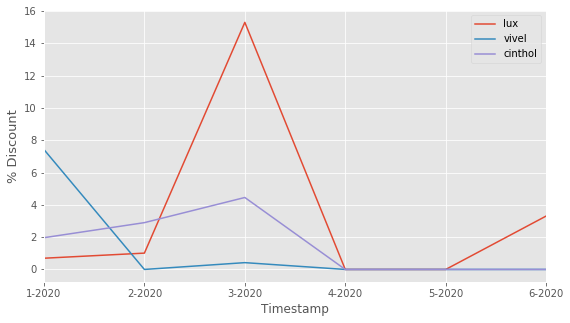

In [164]:
dfluxDiscount = dfDiscountBrand[(dfDiscountBrand.name == 'lux') | (dfDiscountBrand.name.str.contains('lux '))]
dfTimeBrandDiscount = dfluxDiscount.groupby('Timestamp').mean()[['DiscountPercentage']]
dfTimeBrandDiscount['lux'] = dfTimeBrandDiscount['DiscountPercentage']

dfvivelDiscount = dfDiscountBrand[(dfDiscountBrand.name.str.contains('vivel'))]
dfTimeBrandDiscount['vivel'] = dfvivelDiscount.groupby('Timestamp').mean()['DiscountPercentage']

dfcintholDiscount = dfDiscountBrand[(dfDiscountBrand.name.str.contains('cinthol'))]
dfTimeBrandDiscount['cinthol'] = dfcintholDiscount.groupby('Timestamp').mean()['DiscountPercentage']

dfTimeBrandDiscount = dfTimeBrandDiscount.fillna(0)
ax = dfTimeBrandDiscount[['lux','vivel','cinthol']].plot(kind='line', figsize = (9,5))

ax.set_ylabel('% Discount', fontsize=13)

In [159]:
dfTimeBrand

name  lux  vivel  cinthol
Timestamp                           
1-2020       60   60     10      3.0
2-2020      106  106      7      4.0
3-2020      127  127     14     71.0
4-2020       62   62      8      0.0
5-2020       44   44      5      1.0
6-2020       44   44      4      4.0

In [157]:
dfTimeBrandDiscount

DiscountPercentage        lux     vivel   cinthol
Timestamp                                                   
1-2020               0.695000   0.695000  7.430000  1.966667
2-2020               1.011321   1.011321  0.000000  2.900000
3-2020              15.308661  15.308661  0.421429  4.457746
4-2020               0.000000   0.000000  0.000000  0.000000
5-2020               0.000000   0.000000  0.000000  0.000000
6-2020               3.309091   3.309091  0.000000  0.000000

Text(0, 0.5, '#Baskets')

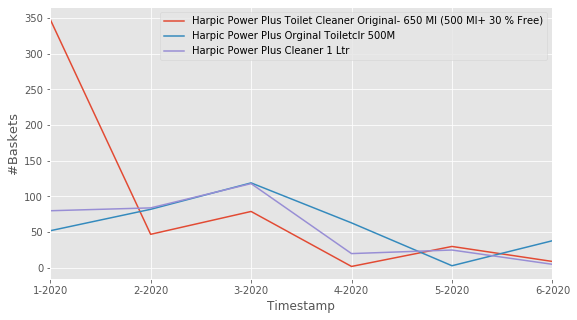

In [66]:
dfHarpic1 = dfBillDate[dfBillDate.name == 'Harpic Power Plus Toilet Cleaner Original- 650 Ml (500 Ml+ 30 % Free)'].groupby('Timestamp')[['id']].count()
dfHarpic1 = dfHarpic1.rename(columns={'id': 'Harpic Power Plus Toilet Cleaner Original- 650 Ml (500 Ml+ 30 % Free)'})

dfHarpic2 = dfBillDate[dfBillDate.name == 'Harpic Power Plus Orginal Toiletclr 500M'].groupby('Timestamp')[['id']].count()
dfHarpic1['Harpic Power Plus Orginal Toiletclr 500M'] = dfHarpic2['id']

dfHarpic3 = dfBillDate[dfBillDate.name == 'Harpic Power Plus Cleaner 1 Ltr'].groupby('Timestamp')[['id']].count()
dfHarpic1['Harpic Power Plus Cleaner 1 Ltr'] = dfHarpic3['id']


matplotlib.style.use('ggplot')
ax = dfHarpic1.plot(kind='line', figsize = (9,5))
ax.set_ylabel('#Baskets', fontsize=13)

In [67]:
dfHarpic1

Harpic Power Plus Toilet Cleaner Original- 650 Ml (500 Ml+ 30 % Free)  \
Timestamp                                                                          
1-2020                                                   348                       
2-2020                                                    47                       
3-2020                                                    79                       
4-2020                                                     2                       
5-2020                                                    30                       
6-2020                                                     9                       

           Harpic Power Plus Orginal Toiletclr 500M  \
Timestamp                                             
1-2020                                           52   
2-2020                                           82   
3-2020                                          119   
4-2020                                           63   
5-2020                                            3   
6-2020                                           38   

           Harpic Power Plus Cleaner 1 Ltr  
Timestamp                                   
1-2020                                  80  
2-2020                                  84  
3-2020                                 118  
4-2020                                  20  
5-2020                                  25  
6-2020                                   5

Text(0, 0.5, 'Total Sales')

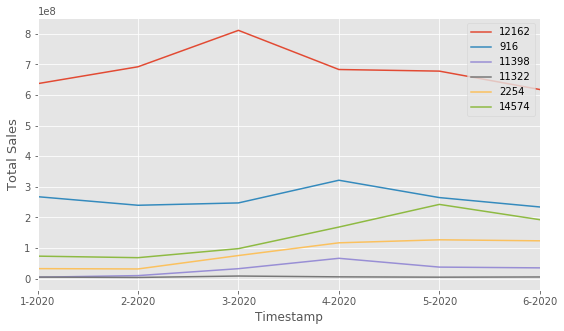

In [136]:
dfStoreSales = dfBillDate[dfBillDate.store_id == 313.0][['Timestamp','net_amount']].drop_duplicates().groupby('Timestamp').sum()
dfStoreSales = dfStoreSales.rename(columns={'net_amount': '313'})
dfStoreSales['12162'] = dfBillDate[dfBillDate.store_id == 12162.0][['Timestamp','net_amount']].drop_duplicates().groupby('Timestamp').sum()[['net_amount']].astype(int)
dfStoreSales['12281'] = dfBillDate[dfBillDate.store_id == 12281.0][['Timestamp','net_amount']].drop_duplicates().groupby('Timestamp').sum()[['net_amount']].astype(int)
dfStoreSales['916'] = dfBillDate[dfBillDate.store_id == 916.0][['Timestamp','net_amount']].drop_duplicates().groupby('Timestamp').sum()[['net_amount']].astype(int)
dfStoreSales['13381'] = dfBillDate[dfBillDate.store_id == 13381.0][['Timestamp','net_amount']].drop_duplicates().groupby('Timestamp').sum()[['net_amount']].astype(int)
dfStoreSales['11398'] = dfBillDate[dfBillDate.store_id == 11398.0][['Timestamp','net_amount']].drop_duplicates().groupby('Timestamp').sum()[['net_amount']].astype(int)
dfStoreSales['11322'] = dfBillDate[dfBillDate.store_id == 11322.0][['Timestamp','net_amount']].drop_duplicates().groupby('Timestamp').sum()[['net_amount']].astype(int)
dfStoreSales['2254'] = dfBillDate[dfBillDate.store_id == 2254.0][['Timestamp','net_amount']].drop_duplicates().groupby('Timestamp').sum()[['net_amount']].astype(int)
dfStoreSales['14574'] = dfBillDate[dfBillDate.store_id == 14574.0][['Timestamp','net_amount']].drop_duplicates().groupby('Timestamp').sum()[['net_amount']].astype(int)


dfStoreSales = dfStoreSales.fillna(0)
dfStoreSales['313'] = dfStoreSales['313'].astype(int)
dfStoreSales['12281'] = dfStoreSales['12281'].astype(int)
dfStoreSales['13381'] = dfStoreSales['13381'].astype(int)
dfStoreSales = dfStoreSales.fillna(0)
#dfStoreSales
ax = dfStoreSales[['12162', '916', '11398', '11322','2254','14574']].plot(kind='line', figsize = (9,5))
ax.set_ylabel('Total Sales', fontsize=13)

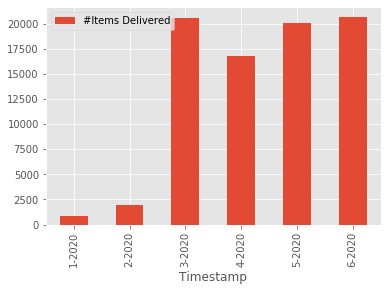

In [159]:
df14574Store = dfBillDate[dfBillDate.store_id == 14574.0]
df14574StoreDel = df14574Store[df14574Store.is_delivery == 1][['is_delivery','Timestamp']].groupby('Timestamp').count()
df14574StoreDel = df14574StoreDel.rename(columns={'is_delivery':'#Items Delivered'})
df14574StoreDel.plot(kind='bar')
#df14574StoreDel


In [222]:
def getPrice(n):  
    try:
        x = dfBillDate[dfBillDate.name == n].head(1)['mrp'].item()
        return(int(x))
    except:
        return(0)
    
def getavg(n):
    return(int(dfBillDate[dfBillDate.name == n][['net_amount']].mean().item()))

dfShampoo = dfBillDate[dfBillDate.name.str.contains('shampoo', case= False, na=True)][['name','id']].groupby('name').count().sort_values(by='id', ascending=False).head(20)
dfShampoo.reset_index(inplace=True)
dfShampoo['price'] = dfShampoo.apply(lambda row: getPrice(row['name']), axis=1)
dfShampoo['Avg Basket Net Amount'] = dfShampoo.apply(lambda row: getavg(row['name']), axis=1)

In [223]:
nameList = ['Clinic Plus Shampoo','Dove Shampoo daily Shine','Pantene. Shampoo Hair Fal Control','Loreal Paris Shampoo Total Repair  Pack Of 12 X 8 Ml','TRESEMME SHAMPOO']
dfSham = dfShampoo[dfShampoo.name.isin(nameList)]
dfSham = dfSham.rename(columns= {'id':'#Baskets'})
dfSham.set_index('name', inplace=True)

In [219]:
dfSham['Avg Basket Net Amount'] = dfSham['Avg Basket Net Amount']/100

In [224]:
dfSham

#Baskets  price  \
name                                                                  
Clinic Plus Shampoo                                     1717   1600   
Dove Shampoo daily Shine                                1178   3200   
Pantene. Shampoo Hair Fal Control                        351   3200   
Loreal Paris Shampoo Total Repair  Pack Of 12 X...       299   4800   
TRESEMME SHAMPOO                                         256   4500   

                                                    Avg Basket Net Amount  
name                                                                       
Clinic Plus Shampoo                                                179851  
Dove Shampoo daily Shine                                           187366  
Pantene. Shampoo Hair Fal Control                                  189735  
Loreal Paris Shampoo Total Repair  Pack Of 12 X...                 223702  
TRESEMME SHAMPOO                                                   255820

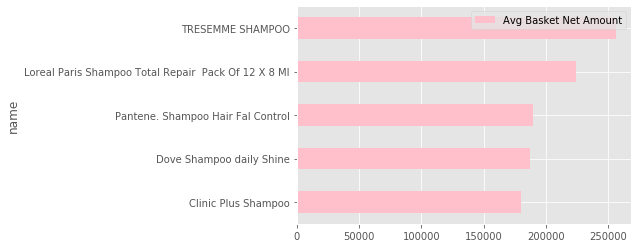

In [235]:
dfSham[['Avg Basket Net Amount']].plot(kind='barh', color = 'pink', stacked='True')

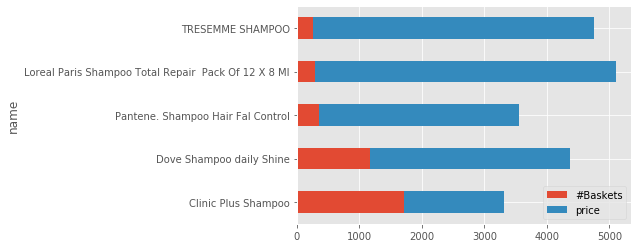

In [239]:
dfSham[['#Baskets','price']].plot(kind='barh', stacked='True')

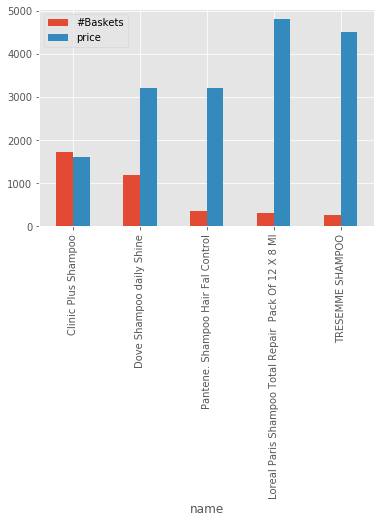

In [229]:
dfSham[['#Baskets','price']].plot(kind='bar')

In [209]:
dfShampoo

name    id  price  \
0                                 Clinic Plus Shampoo  1717   1600   
1                            Dove Shampoo daily Shine  1178   3200   
2        Chik Thick & Glossy Black Shampoo Sachet 7Ml   540   1700   
3                                     SUNSILK SHAMPOO   443   1600   
4                                        dove shampoo   374    500   
5                               SUNSILK BLACK SHAMPOO   362   1600   
6                   Pantene. Shampoo Hair Fal Control   351   3200   
7                          Clinic plus health shampoo   316   1600   
8   Loreal Paris Shampoo Total Repair  Pack Of 12 ...   299   4800   
9                       New dove daily shine shampoo    284   3200   
10                                   TRESEMME SHAMPOO   256   4500   
11                        Karthika Shampoo 5 Ml Pouch   248    100   
12             Vatika Shampoo 7 Satt Poshan+40% Extra   243   1600   
13           Head & Shoulder Basic Clean Shampoo 5 Ml   241   3200   
14  Chick Advance Shampoo Hair Fall Prevent 6 Ml P...   234   2000   
15                                   Sunsilk shampoo    226   1600   
16                                    Sunsilk Shampoo   223   1600   
17                              sunsilk shampoo black   214    100   
18  Head And Shoulders Anti Dandruff Shampoo Basic...   200   3200   
19                                    Sunsilk shampoo   182   1600   

    Avg Basket Net Amount  
0                  179851  
1                  187366  
2                   29802  
3                  198841  
4                  101049  
5                  213106  
6                  189735  
7                  241924  
8                  223702  
9                  259534  
10                 255820  
11                  17638  
12                 135814  
13                 165484  
14                  32518  
15                 218440  
16                 179636  
17                   3733  
18                  15046  
19                 238802

In [212]:
dfStoreDel = dfData[['store_id','id','net_amount','is_delivery']].drop_duplicates()
dfStoreDel = dfStoreDel[dfStoreDel.is_delivery != '\\N']
dfStoreDel = dfStoreDel[dfStoreDel.store_id != 8.0]
dfStoreDel = dfStoreDel[dfStoreDel.net_amount > 0]
dfStoreDel = dfStoreDel.dropna()
dfStoreDel['is_delivery'] = dfStoreDel['is_delivery'].astype(int)
dfStoreDel['store_id'] = dfStoreDel['store_id'].astype(int)
dfStoreDel['netAmount[Rs]'] = dfStoreDel['net_amount']/100
dfStoreDel = dfStoreDel[dfStoreDel['netAmount[Rs]'] < 999999]
dfStoreDelSales = dfStoreDel.groupby(['store_id','is_delivery']).sum().reset_index()

dfDelSal = dfStoreDelSales[['store_id']].drop_duplicates()
dfDelSal['Sales With Delivery(Rs)'] = list(dfStoreDelSales[dfStoreDelSales.is_delivery == 1]['net_amount']/100)
dfDelSal['Sales W/O Delivery(Rs)'] = list(dfStoreDelSales[dfStoreDelSales.is_delivery == 0]['net_amount']/100)
dfDelSal.set_index('store_id', inplace=True)
dfDelSal = dfDelSal.sort_values(by='Sales With Delivery(Rs)', ascending=False)

Text(0, 0.5, 'Net Amount')

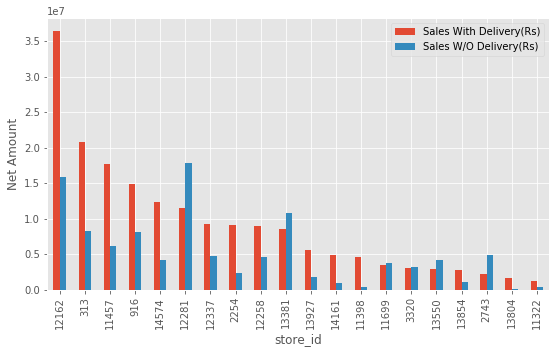

In [213]:
ax = dfDelSal[['Sales With Delivery(Rs)','Sales W/O Delivery(Rs)']].plot(kind='bar', figsize= (9,5))
ax.set_ylabel('Net Amount')

In [214]:
def check(d,nd):
    if(d > nd):
        return('True')
    return('False')
dfDelSal['Delivery Gt W/O Delivery'] = dfDelSal.apply(lambda row: check(row['Sales With Delivery(Rs)'],row['Sales W/O Delivery(Rs)']), axis=1)
dfDelSal.groupby('Delivery Gt W/O Delivery').count()[['Sales With Delivery(Rs)']].rename(columns={'Sales With Delivery(Rs)': '#Stores'})


#Stores
Delivery Gt W/O Delivery         
False                           6
True                           14

In [215]:
##Delivery only
dfStoreDel[dfStoreDel.is_delivery ==1][['netAmount[Rs]']].describe()

netAmount[Rs]
count      368110.00
mean          496.35
std          1739.00
min             0.02
25%            46.00
50%           143.33
75%           450.00
max        289628.00

In [216]:
##Not Delivery 
dfStoreDel[dfStoreDel.is_delivery ==0][['netAmount[Rs]']].describe()

netAmount[Rs]
count      252781.00
mean          413.70
std          1635.85
min             0.20
25%            47.00
50%           123.00
75%           340.00
max        231787.71

In [201]:
dfStoreDel[dfStoreDel['netAmount[Rs]'] == 6982000]

store_id                id   net_amount  is_delivery  netAmount[Rs]
672254     13804  13804_1019000801 698200000.00            0     6982000.00

In [205]:
dfStoreDel[dfStoreDel['netAmount[Rs]'] > 1982000]

store_id                id   net_amount  is_delivery  netAmount[Rs]
672254     13804  13804_1019000801 698200000.00            0     6982000.00
672258     13804  13804_1019000805 225224100.00            0     2252241.00

In [ ]:
dfStoreDel[dfStoreDel['netAmount[Rs]'] < 9999999]

In [207]:
dfStoreDel[dfStoreDel['is_delivery'] == 0].sort_values(by='netAmount[Rs]', ascending=False)

store_id                 id   net_amount  is_delivery  netAmount[Rs]
672254     13804   13804_1019000801 698200000.00            0     6982000.00
672258     13804   13804_1019000805 225224100.00            0     2252241.00
703204     13854   13854_1119007968  23178771.00            0      231787.71
229289       313     313_1019088659  22010600.00            0      220106.00
386577       313     313_1019094763  19029800.00            0      190298.00
...          ...                ...          ...          ...            ...
672974     12337  12337_22119011779        36.00            0           0.36
647192     12337  12337_22119010559        36.00            0           0.36
207897     12281   12281_2119009898        25.00            0           0.25
378796     12281   12281_6119033271        25.00            0           0.25
812200     12281   12281_6119038010        20.00            0           0.20

[252783 rows x 5 columns]

In [208]:
dfStoreDel[dfStoreDel['is_delivery'] == 1].sort_values(by='netAmount[Rs]', ascending=False)

store_id                 id  net_amount  is_delivery  netAmount[Rs]
571988       313     313_1020010960 28962800.00            1      289628.00
423174     12162  12162_27120000313 26800000.00            1      268000.00
818940       313     313-1020016040 22654100.00            1      226541.00
448757       313     313_1020002231 20973900.00            1      209739.00
427708     12162  12162_27120000122 20020000.00            1      200200.00
...          ...                ...         ...          ...            ...
550642     12337  12337_22120005766        8.00            1           0.08
618273     14574   14574_1020022688        4.00            1           0.04
572775     12337  12337_22120004918        4.00            1           0.04
616799     14161   14161_1019011531        4.00            1           0.04
606574     12337  12337-22120011414        2.00            1           0.02

[368110 rows x 5 columns]

In [211]:
dfStoreDel[dfStoreDel['netAmount[Rs]'] > 999999]

store_id                id    net_amount  is_delivery  netAmount[Rs]
453976       313    313_1019102923 2147483647.00            1    21474836.47
588817       313    313_1019101975 2147483647.00            1    21474836.47
672254     13804  13804_1019000801  698200000.00            0     6982000.00
672256     13804  13804_1019000803  999999900.00            0     9999999.00
672258     13804  13804_1019000805  225224100.00            0     2252241.00

In [75]:
dftatasale = dfData[dfData.name.str.contains('Tata Salt1Kg', na=False)][['sale_price','id']]
dftatasale = dftatasale[dftatasale.sale_price != 6500.0]
dftatasale.groupby('sale_price').count().sort_values(by='id', ascending=False)

id
sale_price      
1800.0      8074
1790.0      2408
2000.0      1886
1900.0      1444
1850.0      1214
2200.0         9
1950.0         4
1400.0         1
1700.0         1
1740.0         1

In [79]:
dfdescribe = dftatasale[['sale_price']].describe()
dfdescribe['sale_price'] = dfdescribe.apply(lambda row: round(row['sale_price'],2), axis=1)
dfdescribe

sale_price
count    15042.00
mean      1837.35
std         70.08
min       1400.00
25%       1800.00
50%       1800.00
75%       1850.00
max       2200.00

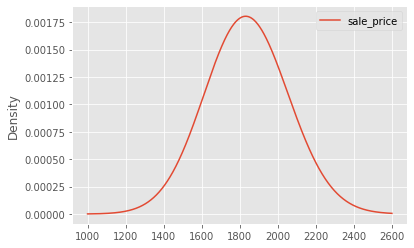

In [95]:
matplotlib.style.use('ggplot')
dftatasale[['sale_price']].plot.kde(bw_method = 3)

In [99]:
dfsq = dfData[dfData.name.str.contains('tata salt', case=False, na=False)][['store_id','id','savings', 'sale_price']]
dftata = dfsq.groupby('store_id').count().rename(columns={'id':'#BasketsWithTataSalt'}).reset_index()
dfstore = dfData[['store_id','id']].drop_duplicates().groupby('store_id').count().reset_index()
def getTot(Storename):
    return(dfstore[dfstore.store_id == Storename]['id'].item())
dftata['TotalBaskets'] = dftata.apply(lambda row: getTot(row['store_id']), axis=1)

dftatadiscount = dfsq[dfsq.savings > 0].groupby('store_id').count()[['id']].reset_index()
def getdis(Storename):
    c = dftatadiscount[dftatadiscount.store_id == Storename]['id']
    if(c.empty):
        return(0)
    else:
        return(c.item())
dftata['TotalBasketsWithDis'] = dftata.apply(lambda row: getdis(row['store_id']), axis=1)

dftatameanprice = dfsq.groupby('store_id')[['sale_price']].mean()
dftatameanprice['MeanPrice'] = dftatameanprice.apply(lambda row: int(row['sale_price']), axis=1)
dftatameanprice = dftatameanprice[['MeanPrice']].reset_index()

def getmean(Storename):
    return(dftatameanprice[dftatameanprice.store_id == Storename]['MeanPrice'].item())
dftata['MeanPrice'] = dftata.apply(lambda row: getmean(row['store_id']), axis=1)

dftata['%Buy'] = (dftata['#BasketsWithTataSalt'] * 100)/ dftata['TotalBaskets']

dfres = dftata.sort_values('TotalBasketsWithDis', ascending=False)
dfres[['store_id','TotalBaskets','#BasketsWithTataSalt','%Buy','TotalBasketsWithDis','MeanPrice']]

store_id  TotalBaskets  #BasketsWithTataSalt       %Buy  \
11   13381.0         29247                  8004  27.366909   
10   12281.0         25942                  2680  10.330738   
12   13550.0         10819                  1231  11.378131   
15   13927.0         29977                   662   2.208360   
4     3320.0         11067                   686   6.198608   
3     2743.0         11475                   597   5.202614   
9    12258.0         35180                   644   1.830586   
5    11398.0         35659                   164   0.459912   
7    11699.0          8970                   296   3.299889   
1      916.0         51417                     3   0.005835   
6    11457.0         42703                   397   0.929677   
13   13804.0          9225                    82   0.888889   
0      313.0         42659                   309   0.724349   
2     2254.0         43360                   562   1.296125   
8    12162.0         26740                     2   0.007479   
14   13854.0         26785                   183   0.683218   

    TotalBasketsWithDis  MeanPrice  
11                 8002       1801  
10                 2679       1829  
12                 1230       1849  
15                  662       1816  
4                   600       1977  
3                   590       1926  
9                   195       1929  
5                    18       1876  
7                     5       1998  
1                     3       1900  
6                     3       2263  
13                    3       1950  
0                     0       2000  
2                     0       2000  
8                     0       2000  
14                    0       1956

In [206]:
int(dfBillDate[dfBillDate.name == 'Loreal Paris Shampoo Total Repair  Pack Of 12 X 8 Ml'][['net_amount']].mean().item())

223702.14046822742

In [204]:
dfBillDate[dfBillDate.name == 'Dove Shampoo daily Shine'][['net_amount']].mean()

net_amount    187366.39219
dtype: float64

In [198]:
dfBillDate[dfBillDate.id == '13381_2019008161'][['name']]

name
14423                                 Diamond Touch Rush
14424                                Arora Namken 250 GM
14425  Loreal Paris Shampoo Total Repair  Pack Of 12 ...
14426                                         SUGAR 2 KG
14427                                       250GM.BATASA
14428                                     Monga Biscuits
14429                              DevSwad Mp Aata 10 kg

In [195]:
dfShampoo['name'][8]

'Loreal Paris Shampoo Total Repair  Pack Of 12 X 8 Ml'

In [191]:
x = dfBillDate[dfBillDate.name == '1213'].head(1)['mrp']
if(x.empty()):
    print('saad')

TypeError: 'bool' object is not callable

1600.0

In [170]:
dfBillDate[dfBillDate.name == 'Dove Shampoo daily Shine'][['name','mrp']]

name     mrp
4134    Dove Shampoo daily Shine  3200.0
4310    Dove Shampoo daily Shine  3200.0
4400    Dove Shampoo daily Shine  3200.0
4773    Dove Shampoo daily Shine  3200.0
5116    Dove Shampoo daily Shine  3200.0
...                          ...     ...
965067  Dove Shampoo daily Shine  3200.0
966678  Dove Shampoo daily Shine  3200.0
970288  Dove Shampoo daily Shine  3200.0
970675  Dove Shampoo daily Shine  3200.0
987814  Dove Shampoo daily Shine  3200.0

[1178 rows x 2 columns]

In [171]:
dfBillDate[dfBillDate.name == 'Chik Thick & Glossy Black Shampoo Sachet 7Ml'][['name','mrp']]

name     mrp
10654   Chik Thick & Glossy Black Shampoo Sachet 7Ml  1700.0
44172   Chik Thick & Glossy Black Shampoo Sachet 7Ml  1700.0
45023   Chik Thick & Glossy Black Shampoo Sachet 7Ml  1700.0
87480   Chik Thick & Glossy Black Shampoo Sachet 7Ml  1700.0
575915  Chik Thick & Glossy Black Shampoo Sachet 7Ml  1700.0
...                                              ...     ...
796873  Chik Thick & Glossy Black Shampoo Sachet 7Ml   100.0
797397  Chik Thick & Glossy Black Shampoo Sachet 7Ml   100.0
799442  Chik Thick & Glossy Black Shampoo Sachet 7Ml   100.0
801451  Chik Thick & Glossy Black Shampoo Sachet 7Ml   100.0
805220  Chik Thick & Glossy Black Shampoo Sachet 7Ml   100.0

[540 rows x 2 columns]

In [23]:
doveIdList = list(dfData[dfData.name == 'Clinic plus health shampoo']['id'].drop_duplicates())
dfDoveBaskets = dfData[dfData.id.isin(doveIdList)]
dfDoveBaskets[['name','id']].groupby('name').count().sort_values(by='id', ascending=False).head(25)

id
name                                                   
Clinic plus health shampoo                          316
Sugar 1 KG                                          173
Tata Salt1Kg                                        147
Fortune Refined Soyabean Oil 1 Ltr Pouch             88
Rajdhani Besan 1kg                                   56
Chana Daal 500Gm                                     49
Rajdhani Besan 500Gms                                48
Jeera sabut 100 gm                                   47
Ghari 113 Gm Ewrpk Pahle Istemal Karo Phir Visw...   47
Rajma white 500Gm                                    43
 Red Masur 1KG                                       42
Chole White 500Gm                                    42
Jeera sabut 200 gm                                   41
Arhar daal 1kg                                       40
Moong Chilka 500Gm                                   40
chole white 1 kg                                     36
 kbm Haldi powder 200 gm                             36
 Red Masur 500Gm                                     33
Rajma White 1kg                                      33
 kbm haldi powder 100 gm                             32
Vim lemon 4×115 gm                                   31
Godrej No.1 Sandal Turmeric Bath Soap 4*100G= 400G   31
GAAY CHHAP DHANIYA POWDER  200GM                     30
Chana Black 1Kg                                      29
Today [L] [Mainpk] 250 Gm Plpch Premium Zero Fa...   28

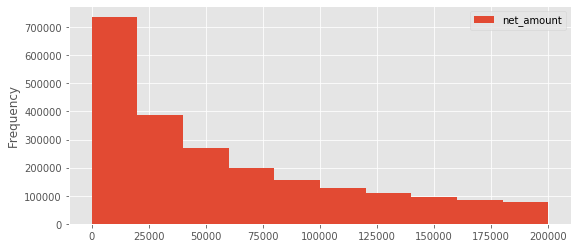

In [283]:

dfAmountLowerLimit = dfNetAmount[dfNetAmount.net_amount < 200000]
dfAmountLowerLimit.plot(kind='hist',figsize = (9,4))
#dfNetAmount = dfNetAmount.sort_values(by='net_amount')
#dfNetAmount[['net_amount']].plot(kind='hist', bins=20, alpha = 0.5)


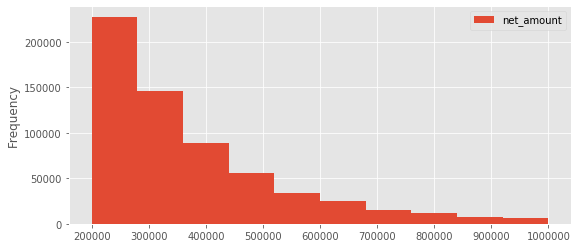

In [285]:
dfAmountMiddleLimit = dfNetAmount[(dfNetAmount.net_amount > 200000) & (dfNetAmount.net_amount < 1000000)]
dfAmountMiddleLimit.plot(kind='hist', figsize = (9,4))

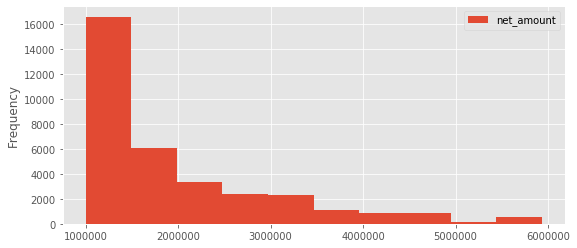

In [290]:
dfAmountUpperLimit = dfNetAmount[(dfNetAmount.net_amount > 1000000) & (dfNetAmount.net_amount < 6000000)]
dfAmountUpperLimit.plot(kind='hist', figsize = (9,4))

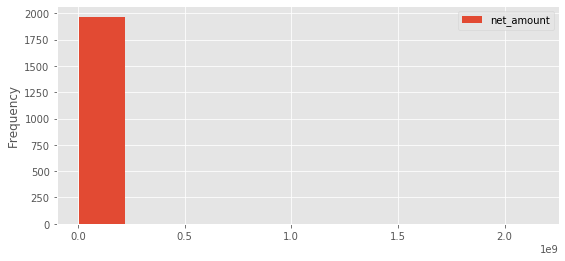

In [291]:
dfAmountUpperLimit = dfNetAmount[(dfNetAmount.net_amount > 6000000)]
dfAmountUpperLimit.plot(kind='hist', figsize = (9,4))

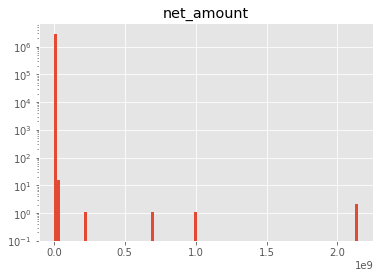

In [279]:
fig, ax = plt.subplots()
dfNetAmount.hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')

In [292]:
dfNetAmount.sort_values(by='net_amount', ascending=True)

net_amount
681290           1
606574           2
606575           2
616799           4
572775           4
...            ...
672258   225224100
672254   698200000
672256   999999900
588817  2147483647
453976  2147483647

[2892463 rows x 1 columns]

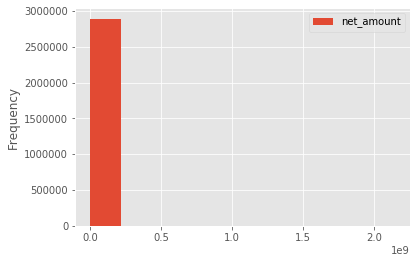

In [250]:
dfNetAmount['net_amount'].value_counts(bins=100, sort=False)

(-2147482.6470000003, 21474837.46]    2892442
(21474837.46, 42949673.92]                 16
(42949673.92, 64424510.38]                  0
(64424510.38, 85899346.84]                  0
(85899346.84, 107374183.3]                  0
                                       ...   
(2040109464.7, 2061584301.16]               0
(2061584301.16, 2083059137.62]              0
(2083059137.62, 2104533974.08]              0
(2104533974.08, 2126008810.54]              0
(2126008810.54, 2147483647.0]               2
Name: net_amount, Length: 100, dtype: int64

In [220]:
dfNetAmount[['total']].drop_duplicates()

total
681290          (0.999, 19600.0]
617385        (19600.0, 65000.0]
746374       (65000.0, 182100.0]
80390   (182100.0, 2147483647.0]

In [232]:
dfNetAmount.groupby('total').count()

net_amount
total                               
(0.999, 6000.0]               293791
(6000.0, 14120.0]             284716
(14120.0, 26000.0]            292506
(26000.0, 42200.0]            286736
(42200.0, 65000.0]            289442
(65000.0, 98600.0]            288698
(98600.0, 148880.0]           288841
(148880.0, 222600.0]          289673
(222600.0, 353900.0]          288976
(353900.0, 2147483647.0]      289084

In [240]:
import numpy as np
interval_range = pd.interval_range(start=0, freq=10000, end=200000)
dfNetAmount['total_cut'] = pd.cut(dfNetAmount['net_amount'], bins=interval_range)
dfNetAmount

net_amount                     total       total_cut
681290           1           (0.999, 6000.0]  (0.0, 10000.0]
606574           2           (0.999, 6000.0]  (0.0, 10000.0]
606575           2           (0.999, 6000.0]  (0.0, 10000.0]
616799           4           (0.999, 6000.0]  (0.0, 10000.0]
572775           4           (0.999, 6000.0]  (0.0, 10000.0]
...            ...                       ...             ...
672258   225224100  (353900.0, 2147483647.0]             NaN
672254   698200000  (353900.0, 2147483647.0]             NaN
672256   999999900  (353900.0, 2147483647.0]             NaN
588817  2147483647  (353900.0, 2147483647.0]             NaN
453976  2147483647  (353900.0, 2147483647.0]             NaN

[2892463 rows x 3 columns]

In [238]:
dfNetAmount[['total_cut']].drop_duplicates()

total_cut
681290             (0.0, 89478485.292]
672258  (178956970.583, 268435455.875]
672254  (626349397.042, 715827882.333]
672256   (984263338.208, 1073741823.5]
588817  (2058005161.708, 2147483647.0]

In [241]:
dfNetAmount

net_amount                     total       total_cut
681290           1           (0.999, 6000.0]  (0.0, 10000.0]
606574           2           (0.999, 6000.0]  (0.0, 10000.0]
606575           2           (0.999, 6000.0]  (0.0, 10000.0]
616799           4           (0.999, 6000.0]  (0.0, 10000.0]
572775           4           (0.999, 6000.0]  (0.0, 10000.0]
...            ...                       ...             ...
672258   225224100  (353900.0, 2147483647.0]             NaN
672254   698200000  (353900.0, 2147483647.0]             NaN
672256   999999900  (353900.0, 2147483647.0]             NaN
588817  2147483647  (353900.0, 2147483647.0]             NaN
453976  2147483647  (353900.0, 2147483647.0]             NaN

[2892463 rows x 3 columns]

In [244]:

dfNetAmount['net_amount'].value_counts(bins=4, sort=False)

(-2147482.6470000003, 536870912.5]    2892459
(536870912.5, 1073741824.0]                 2
(1073741824.0, 1610612735.5]                0
(1610612735.5, 2147483647.0]                2
Name: net_amount, dtype: int64

In [247]:
import sys
!{sys.executable} -m pip install python-igraph

     |████████████████████████████████| 2.2 MB 3.7 MB/s eta 0:00:01
You should consider upgrading via the '/Users/ks/anaconda3/bin/python -m pip install --upgrade pip' command.


In [288]:
import igraph
from igraph import Graph, EdgeSeq
nr_vertices = 25
v_label = list(map(str, range(nr_vertices)))
G = Graph.Tree(nr_vertices, 2) # 2 stands for children number
lay = G.layout('rt')

position = {k: lay[k] for k in range(nr_vertices)}
Y = [lay[k][1] for k in range(nr_vertices)]
M = max(Y)

es = EdgeSeq(G) # sequence of edges
E = [e.tuple for e in G.es] # list of edges

L = len(position)
Xn = [position[k][0] for k in range(L)]
Yn = [2*M-position[k][1] for k in range(L)]
Xe = []
Ye = []
for edge in E:
    Xe+=[position[edge[0]][0],position[edge[1]][0], None]
    Ye+=[2*M-position[edge[0]][1],2*M-position[edge[1]][1], None]

labels = v_label

import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=Xe,
                   y=Ye,
                   mode='lines',
                   line=dict(color='rgb(210,210,210)', width=1),
                   hoverinfo='none'
                   ))
fig.add_trace(go.Scatter(x=Xn,
                  y=Yn,
                  mode='markers',
                  name='bla',
                  marker=dict(symbol='circle-dot',
                                size=18,
                                color='#6175c1',    #'#DB4551',
                                line=dict(color='rgb(50,50,50)', width=1)
                                ),
                  text=labels,
                  hoverinfo='text',
                  opacity=0.8
                  ))

def make_annotations(pos, text, font_size=10, font_color='rgb(250,250,250)'):
    L=len(pos)
    if len(text)!=L:
        raise ValueError('The lists pos and text must have the same len')
    annotations = []
    for k in range(L):
        annotations.append(
            dict(
                text=labels[k], # or replace labels with a different list for the text within the circle
                x=pos[k][0], y=2*M-position[k][1],
                xref='x1', yref='y1',
                font=dict(color=font_color, size=font_size),
                showarrow=False)
        )
    return annotations

axis = dict(showline=False, # hide axis line, grid, ticklabels and  title
            zeroline=False,
            showgrid=False,
            showticklabels=False,
            )

fig.update_layout(title= 'Items',
              annotations=make_annotations(position, v_label),
              font_size=12,
              showlegend=False,
              xaxis=axis,
              yaxis=axis,
              margin=dict(l=40, r=40, b=85, t=100),
              hovermode='closest',
              plot_bgcolor='rgb(248,248,248)'
              )
fig.show()

In [255]:
labels

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24']

In [289]:
dfData[['name','id']].groupby('name').count().sort_values(by= 'id', ascending= False).head(25)

id
name                                            
Food                                      290612
Others                                     28582
Amul Taza 500ml                            20093
Tata Salt1Kg                               15043
Gokul Full Cream 500ml                     11152
Mother Dairy 500ml                         10429
Loose Rice                                  9540
Fortune Refined Soyabean Oil 1 Ltr Pouch    9233
Dodla Dairy Toned Milk 250 Ml Pouch         8806
JADA.SUGAR                                  7911
Arora Namken 250 GM                         7510
SUGAR                                       7461
TOMATO                                      6990
SUGAR 2 KG                                  6508
CORIANDER                                   6305
sugar                                       5909
POTATO                                      5736
Eggs Anda                                   5609
Monga Biscuits                              5382
Amul Toned Milk 500 Gms                     5181
Egg                                         5066
LEMON                                       4960
SUGAR 5KG                                   4921
ONION                                       4914
Britannia 100% Whole Wheat Bread 400 Gm     4667